# Компания "Работа с заботой" (HR-аналитика)

***Цели исследования:***

1. Изучить данные о характеристиках сотрудников фирмы-клиента компании HR-аналитики "Работа с заботой".
2. Построить модель, которая предскажет уровень удовлетворенности сотрудников.
3. Построить модель, которая предскажет увольнение сотрудников из компании.

***Задачи и ход исследования:***

1. Предобработка данных.
2. Исследовательский анализ данных.

   - Построить распределение сотрудников по количественным и качественным показателям.
   - Изучить данные показателей, выявить закономерности.

3. Корреляционный анализ.

   - Выявить количественные и качественные показатели, которые больше всего влияют на уровень удовлетворенности сотрудников и на вероятность увольнения.
   - Сделать выводы о наличии мультиколлинеарности. При необходимости - устранить.

4. Построить модель, которая предскажет уровень удовлетворенности сотрудников.

5. Построить модель, которая предскажет увольнение сотрудников из компании.


***Описание данных***

- Данные разделены на тренировочную и тестовую выборки. Целевой признак тестовой выборки представлен отдельно.
- Данные представляют собой показатели, отражающие уровень занимаемой должности сотрудников в компании, их стаж, поощрения со стороны руководства, а также фиксация дисциплинарных проступков. 



# Задача №1

## Загрузка данных

In [1]:
!pip install scikit-learn==1.1.3 -q
!pip install matplotlib==3.5.2 -q
!pip install phik -q 

In [2]:
# Все импорты тут:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

# Работа с пайплайнами
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# Разделение данных на выборки
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Классы для преобразования данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

# Модели
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyRegressor, DummyClassifier

# Метрики
from sklearn.metrics import make_scorer, roc_auc_score

# создание констант RANDOM_STATE
RANDOM_STATE = 42

In [3]:
# Открытие данных через конструкцию try-except

try:
    train = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('/datasets/test_features.csv')
    y_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

except:
    train = pd.read_csv('datasets/train_job_satisfaction_rate.csv')
    X_test = pd.read_csv('datasets/test_features.csv')
    y_test = pd.read_csv('datasets/test_target_job_satisfaction_rate.csv')

In [4]:
df_list = {'train': train, 
           'X_test': X_test,
           'y_test': y_test}

In [5]:
# Выведем первые строки и общую информацию о каждом датасете
for name, df in df_list.items():
    print('_' * 60)
    print('_' * 28 + name + '_' * 27)
    print('_' * 60)
    display(df.head())
    display(df.info())
    display(df.describe())

____________________________________________________________
____________________________train___________________________
____________________________________________________________


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


____________________________________________________________
____________________________X_test___________________________
____________________________________________________________


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


____________________________________________________________
____________________________y_test___________________________
____________________________________________________________


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


__Таким образом, в нашем распоряжении 3 датафрейма:__

1. `train` - Тренировочная выборка.
2. `X_test` - Входные признаки тестовой выборки.
3. `y_test` - Целевой признак тестовой выборки.

## Предобработка данных

### Сделать `id` индексом 

In [6]:
train = train.set_index('id')
X_test = X_test.set_index('id')
y_test = y_test.set_index('id')

### Поиск дубликатов

#### Неявные дубликаты

Замена пробелов пропущенными значениями

In [7]:
train = train.replace(' ', np.nan)
X_test = X_test.replace(' ', np.nan)

Далее проверим категориальные признаки на предмет наличия в них неявных дубликатов

In [8]:
train['dept'].value_counts()

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

In [9]:
X_test['dept'].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

In [10]:
train['level'].value_counts()

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

In [11]:
# сделаем исправление грамматической ошибки
train['level'] = train['level'].replace('sinior', 'senior')

In [12]:
X_test['level'].value_counts()

junior    974
middle    854
sinior    171
Name: level, dtype: int64

In [13]:
# сделаем исправление грамматической ошибки
X_test['level'] = X_test['level'].replace('sinior', 'senior')

In [14]:
train['workload'].value_counts()

medium    2066
low       1200
high       734
Name: workload, dtype: int64

In [15]:
X_test['workload'].value_counts()

medium    1043
low        593
high       363
Name: workload, dtype: int64

Неявные дубликаты не обнаружены.

#### Явные дубликаты

In [16]:
# Проверка таблицы train на наличие дубликатов. 
# Наличие дубликатов в таблице test не создаст помех.
print(f"В таблице `train` содержится {train.duplicated().sum()} явных дубликатов.")

В таблице `train` содержится 245 явных дубликатов.


### Поиск пропущенных значений

In [17]:
df_list = {'train': train, 
           'X_test': X_test}

for name, df in df_list.items():
    print('_' * 40)
    print(f"Количество пропусков в таблице {name}:")
    print(df.isna().sum())

________________________________________
Количество пропусков в таблице train:
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
________________________________________
Количество пропусков в таблице X_test:
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Пропуски в значениях будут обработаны на этапе подготовки данных

### Изменение типов данных

In [18]:
for name, df in df_list.items():
    print('_' * 40)
    print(f"Типы данных в таблице {name}:")
    print(df.info())

________________________________________
Типы данных в таблице train:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 155278 to 338347
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept                   3994 non-null   object 
 1   level                  3996 non-null   object 
 2   workload               4000 non-null   object 
 3   employment_years       4000 non-null   int64  
 4   last_year_promo        4000 non-null   object 
 5   last_year_violations   4000 non-null   object 
 6   supervisor_evaluation  4000 non-null   int64  
 7   salary                 4000 non-null   int64  
 8   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 312.5+ KB
None
________________________________________
Типы данных в таблице X_test:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 co

## Предобработка данных. Выводы.

- В таблицах столбец `id` был сделан индексом для удобства дальнейших обработок и упрощения поиска дубликатов. 
- Изначально были найдены пропуски данных в виде пробелов. В последующем они были заменены на пропущенные значения.
- Была исправлена грамматическая ошибка в слове "senior" в таблицах `train` и `X_test`.
- Было найдено 245 дубликатов в таблице `train`. Затем - дубликаты были удалены. 
- Были найдены пропущенные значения в таблицах `train` и `X_test`. Обработка пропусков будет осуществляться на этапе построения модели.
- Типы данных в столбцах таблиц стоят такие, какие нужно. Замена не требуется.  

## Исследовательский анализ данных 

### Функции для построения диаграмм

In [19]:
# Функция для построения диаграммы размаха и гистограммы для количественных признаков
def box_hist_plot(data, column, title, xlabel, bins):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(title, fontsize=20)
    
    ax1.boxplot(data[column])
    ax1.set_title('Диаграмма размаха')
    ax1.set_xticks([])
    ax1.set_xlabel(xlabel)
    
    ax2.hist(data[column], bins=bins)
    ax2.set_title('Гистограмма')
    ax2.set_xlabel(xlabel)
    # Добавление подписей через plt.annotate
    for p in ax2.patches:
        height = p.get_height()
        ax2.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='bottom') 

    plt.show()

In [20]:
# Функция для построения столбчатой и круговой диаграмм для категориальных признаков
def bar_round_plot(data, column, title):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(title, fontsize=20)
    
    ax1.bar(height=data[column].value_counts(), x=data[column].value_counts().index)
    ax1.set_title('Столбчатая диаграмма')
    # Добавление подписей через plt.annotate
    for p in ax1.patches:
        height = p.get_height()
        ax1.annotate(f'{height.round(2)}',
                     (p.get_x() + p.get_width() / 2, height),
                     ha='center',
                     va='bottom')
    plt.setp(ax1.get_xticklabels(), rotation=90)


    ax2.pie(x=data[column].value_counts(),
                  autopct='%1.1f%%',
                  wedgeprops={'lw':2, 'ls':'-','edgecolor':"k"}) 
    ax2.set_title('Круговая диаграмма')
    ax2.legend(data[column].value_counts().index, loc="upper right")

    plt.show()

### Категориальные признаки

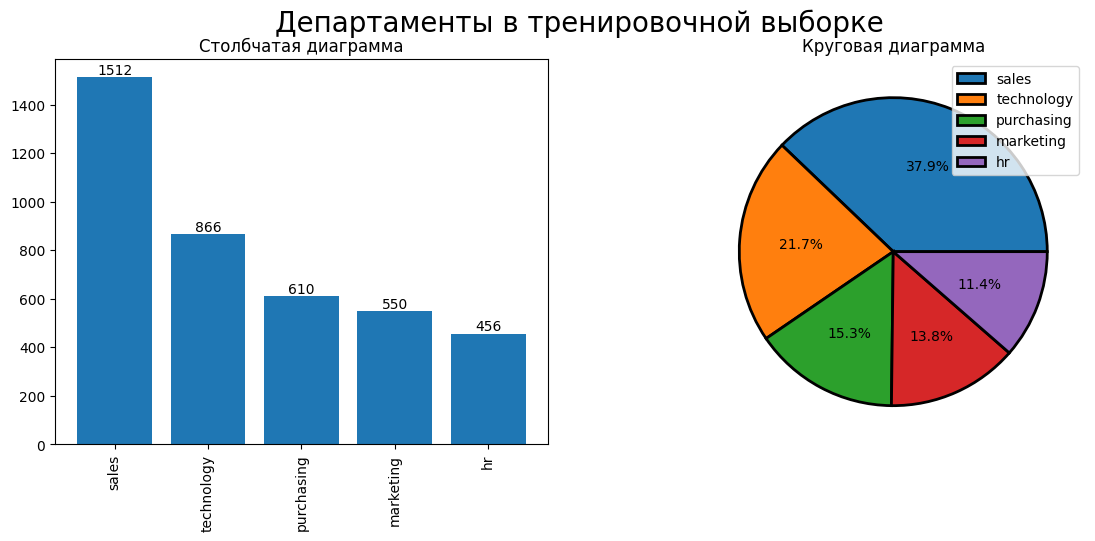

In [21]:
bar_round_plot(train, 'dept', 'Департаменты в тренировочной выборке')

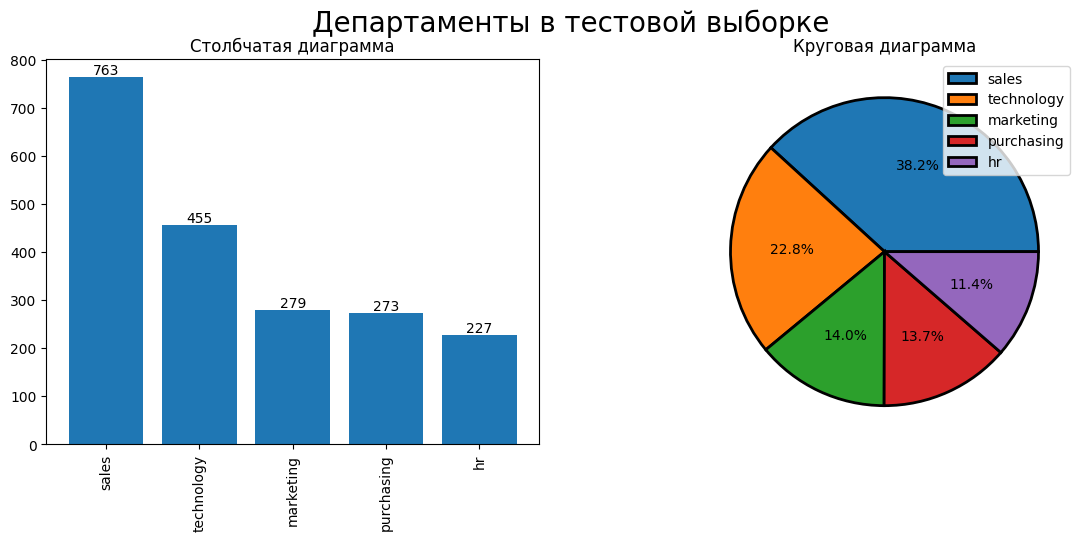

In [22]:
bar_round_plot(X_test, 'dept', 'Департаменты в тестовой выборке')

Тренировочная и тестовая выборки сходи по структуре департаментов. Однако, есть незначительные различия в 3 и 4 по популярности департаментам в структуре: в тренировочной выборке на 3-м месте стоит отдел закупок, в тестовой выборке - отдел маркетинга. 

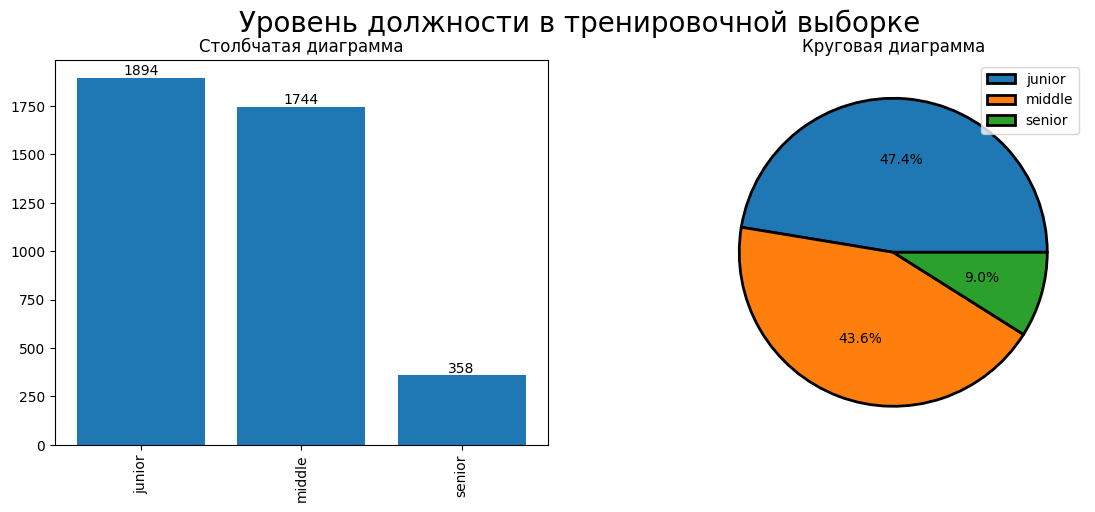

In [23]:
bar_round_plot(train, 'level', 'Уровень должности в тренировочной выборке')

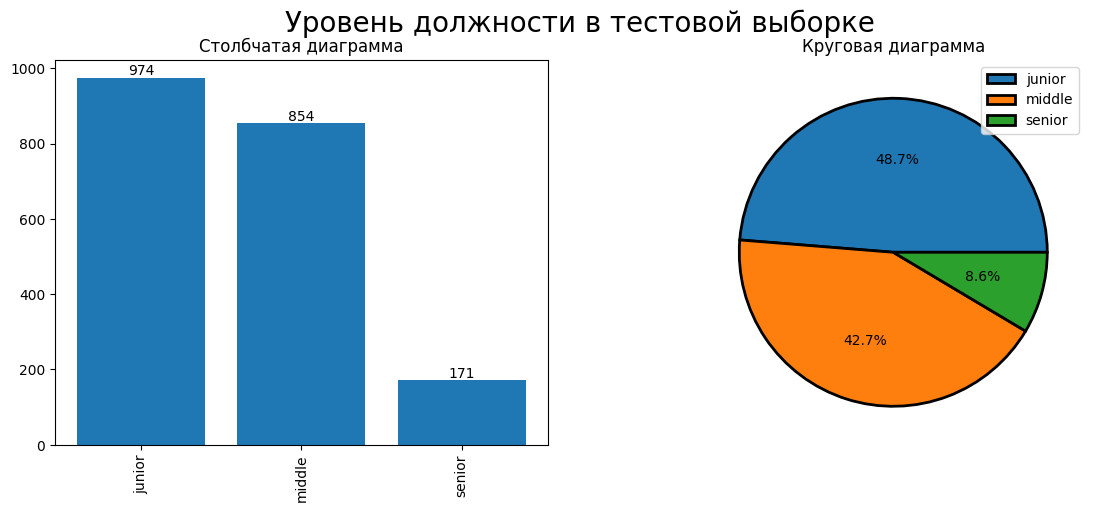

In [24]:
bar_round_plot(X_test, 'level', 'Уровень должности в тестовой выборке')

Тренировочная и тестовая выборки сходи по распределению уровней должности сотрудников. Специалистов среднего звена чуть меньше, чем новичков, в старших специалистов - меньше всего. 

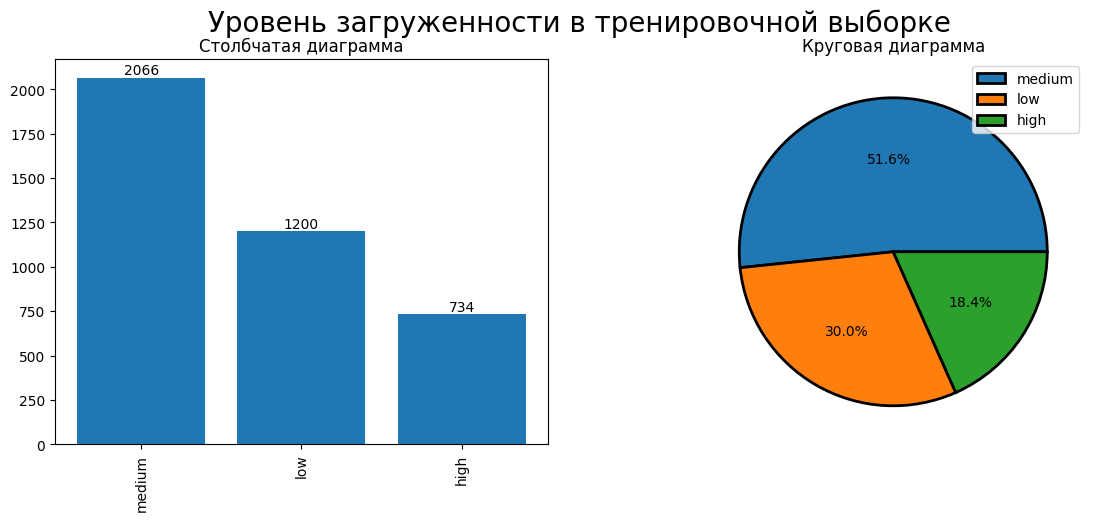

In [25]:
bar_round_plot(train, 'workload', 'Уровень загруженности в тренировочной выборке')

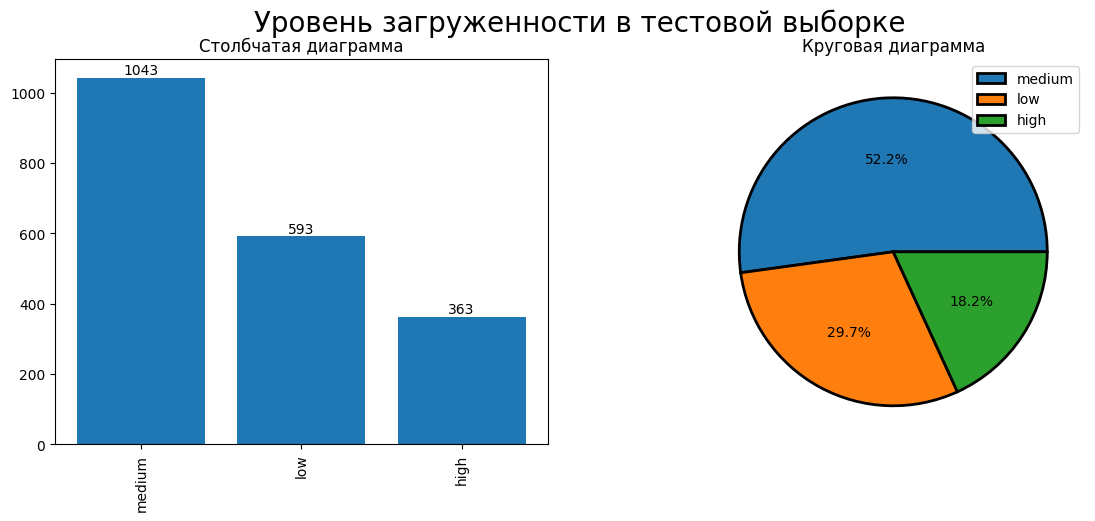

In [26]:
bar_round_plot(X_test, 'workload', 'Уровень загруженности в тестовой выборке')

По структуре уровня нагрузки тренировочная и тестовые выборки совпадают. Специалистов со средним уровнем нагрузки большинство (более 50%). Сотрудников с высоким уровнем нагрузки - меньше всего, что хорошо для компании, если она хочет избежать текучки кадров, так как одной из причин увольнений часто может быть высокая нагрузка и последующее "выгорание".

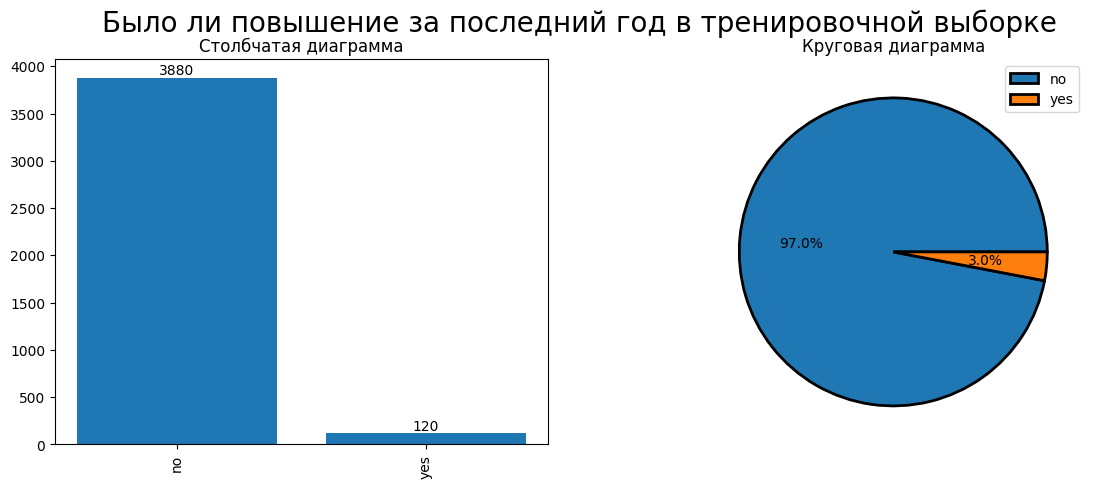

In [27]:
bar_round_plot(train, 'last_year_promo', 'Было ли повышение за последний год в тренировочной выборке')

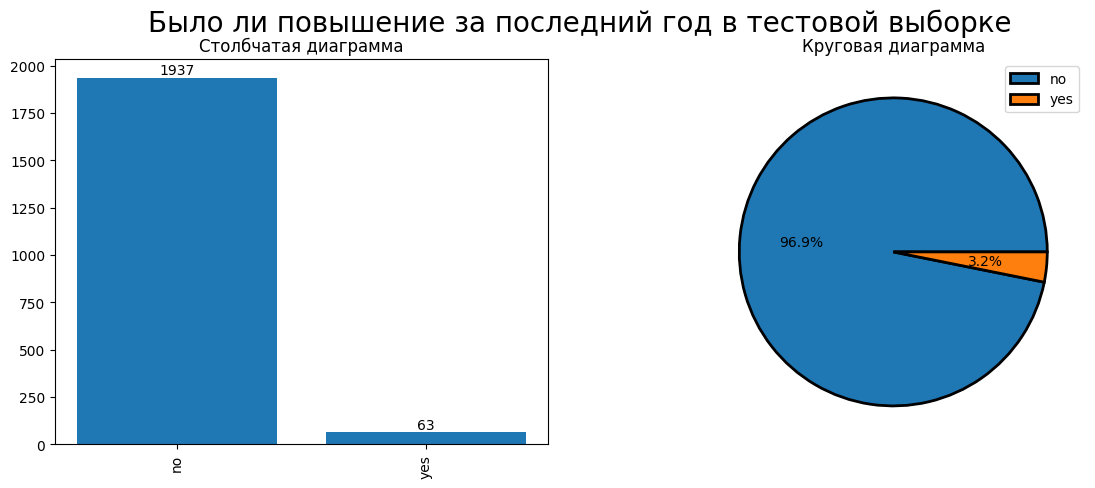

In [28]:
bar_round_plot(X_test, 'last_year_promo', 'Было ли повышение за последний год в тестовой выборке')

Тренировочная и тестовая выборки совпадают по проценту повышений за последний год. Стоит отметить, что доля людей с повышением весьма низкая. Если в этой компании индексация заработной платы также предполагает "повышение", то у подавляющего большинства сотрудников за последний год не было никакого поощрения со стороны руководства. Сотрудникам важно, что их труд оценивают по достоинству.  

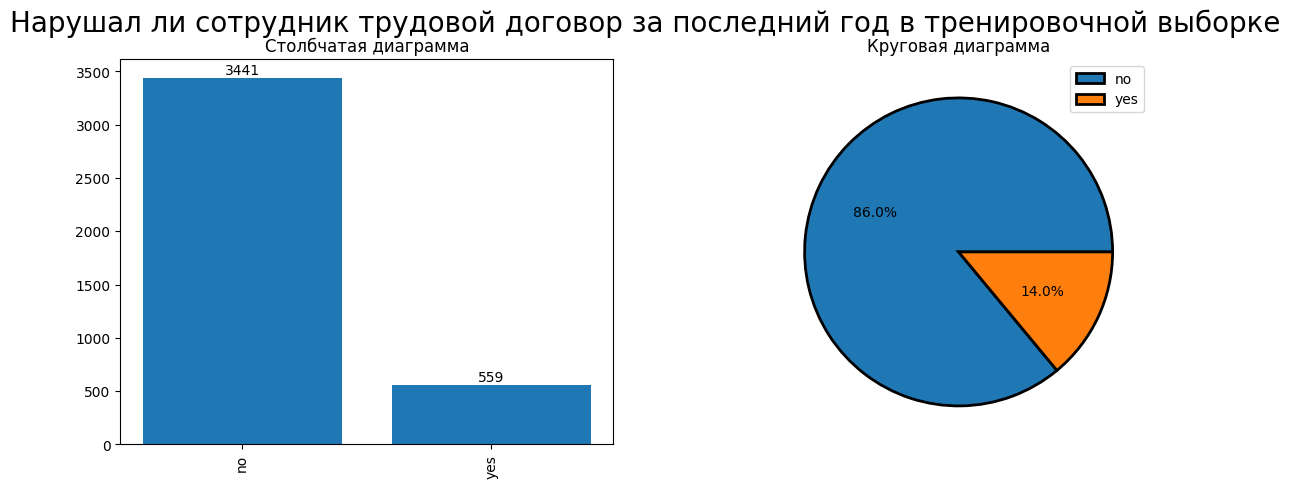

In [29]:
bar_round_plot(train, 'last_year_violations', 'Нарушал ли сотрудник трудовой договор за последний год в тренировочной выборке')

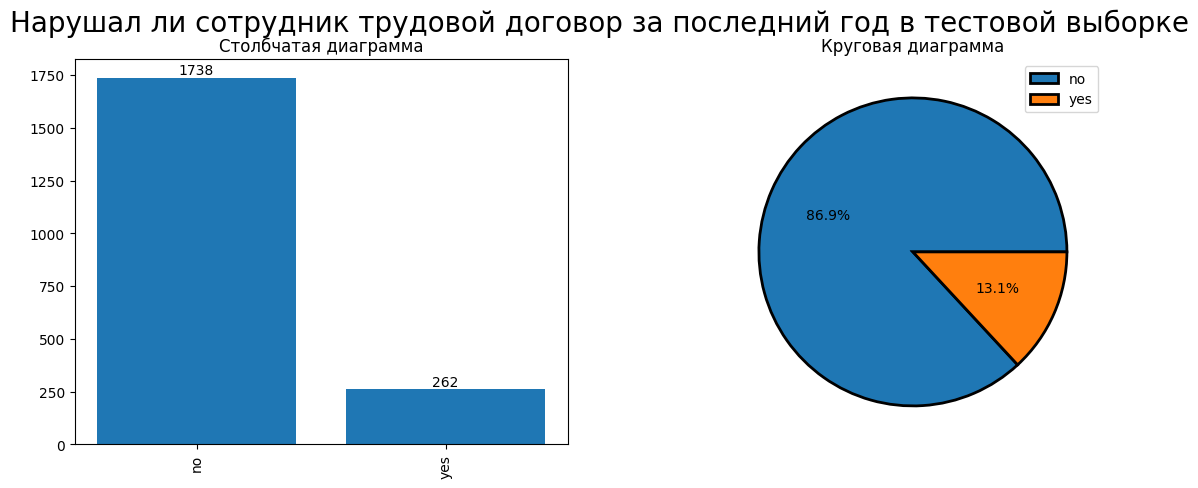

In [30]:
bar_round_plot(X_test, 'last_year_violations', 'Нарушал ли сотрудник трудовой договор за последний год в тестовой выборке')

По частоте нарушений трудового договора структуры тренировочной и тестовой выборки совпадают.

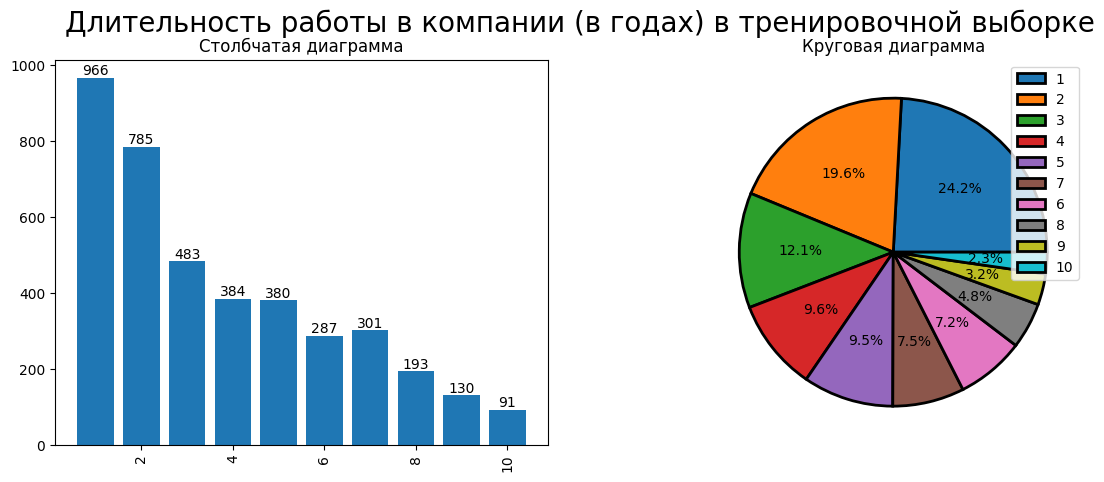

In [31]:
bar_round_plot(train, 'employment_years', 'Длительность работы в компании (в годах) в тренировочной выборке')

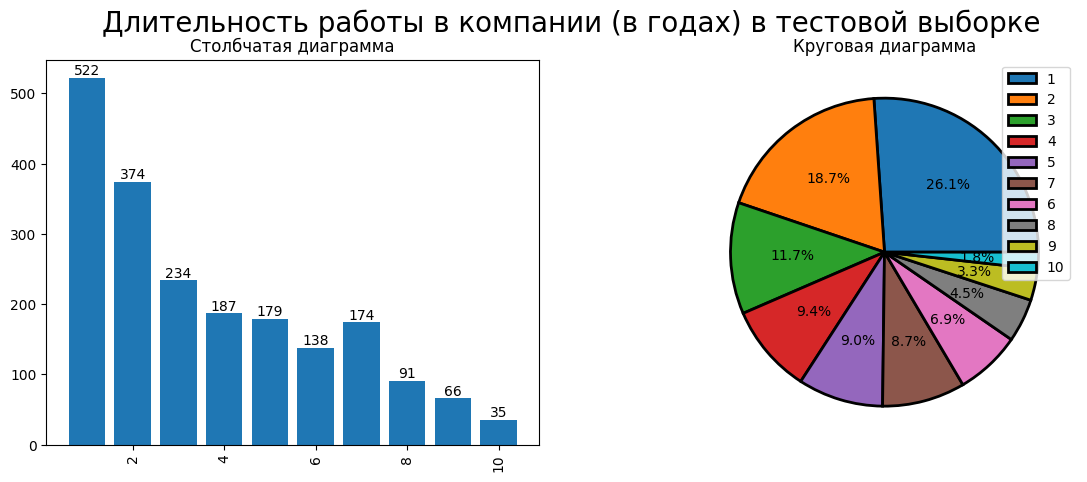

In [32]:
bar_round_plot(X_test, 'employment_years', 'Длительность работы в компании (в годах) в тестовой выборке')

В тесовую выборку попало на 4% больше сотрудников со стажем в 1 год. Чем больше стаж сотрудников, тем их становится меньше. Парадоксально, что сотрудников со стажем в 6 лет меньше, чем сотрудников со стажем в 7 лет. Судя по всему часть данных была очищена после удаления дубликатов. 

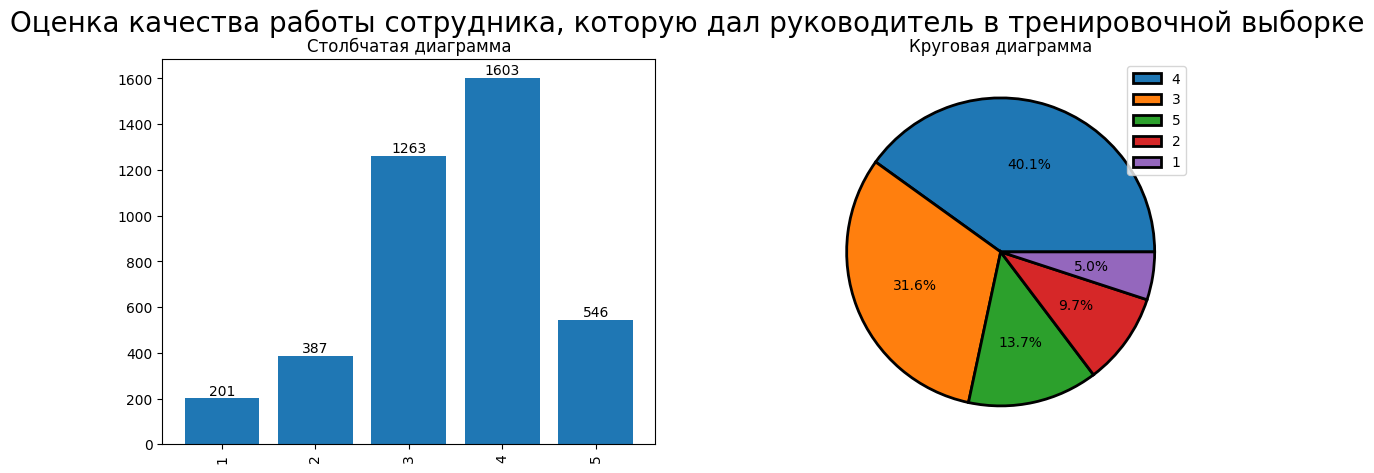

In [33]:
bar_round_plot(train, 'supervisor_evaluation', 'Оценка качества работы сотрудника, которую дал руководитель в тренировочной выборке')

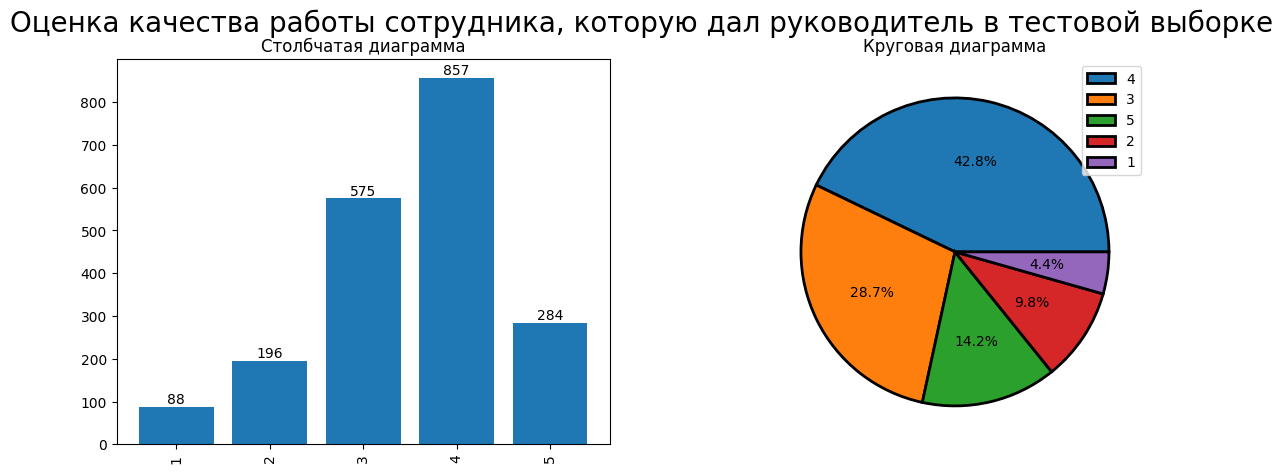

In [34]:
bar_round_plot(X_test, 'supervisor_evaluation', 'Оценка качества работы сотрудника, которую дал руководитель в тестовой выборке')

По структуре оценок выборки совпадают. Преобладают оценки 4 и 3. Получется, что у руководства в большинстве случает есть вопросы к качеству работы сотрудников. Отсюда и весьма редкие повышения.

### Количественные признаки

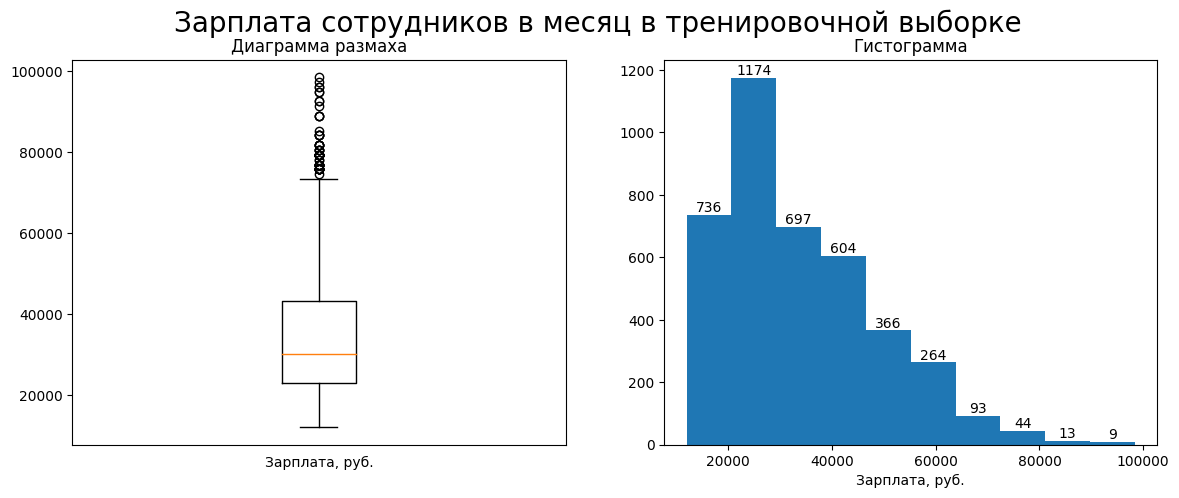

In [35]:
box_hist_plot(train, 'salary', 'Зарплата сотрудников в месяц в тренировочной выборке', 'Зарплата, руб.', 10)

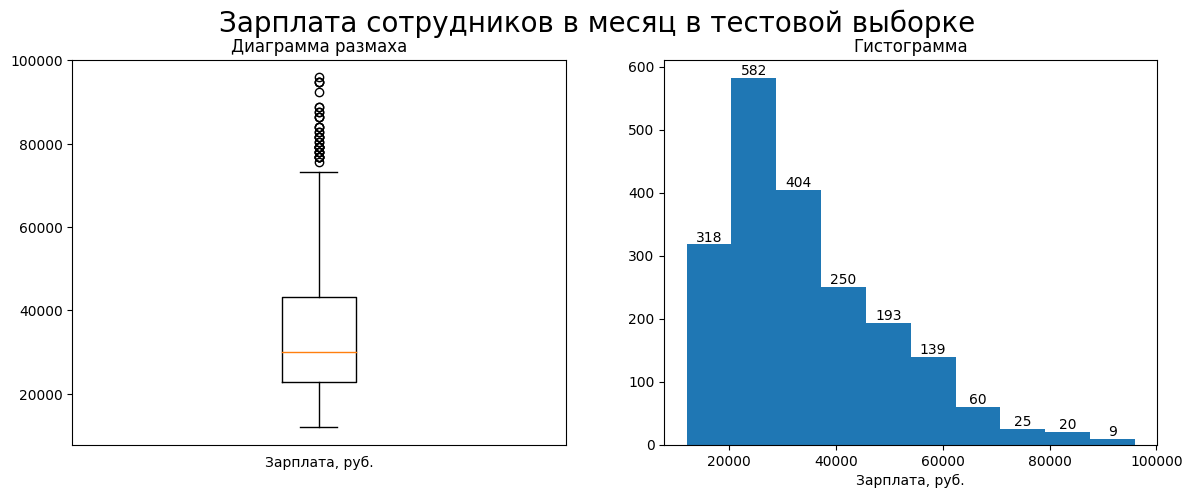

In [36]:
box_hist_plot(X_test, 'salary', 'Зарплата сотрудников в месяц в тестовой выборке', 'Зарплата, руб.', 10)

Медианные значения выборок и распределения схожи. Так как в компании большинство сотрудников с малым опытом, на начальной должности, то и распределение заработних плат соответствующее. 

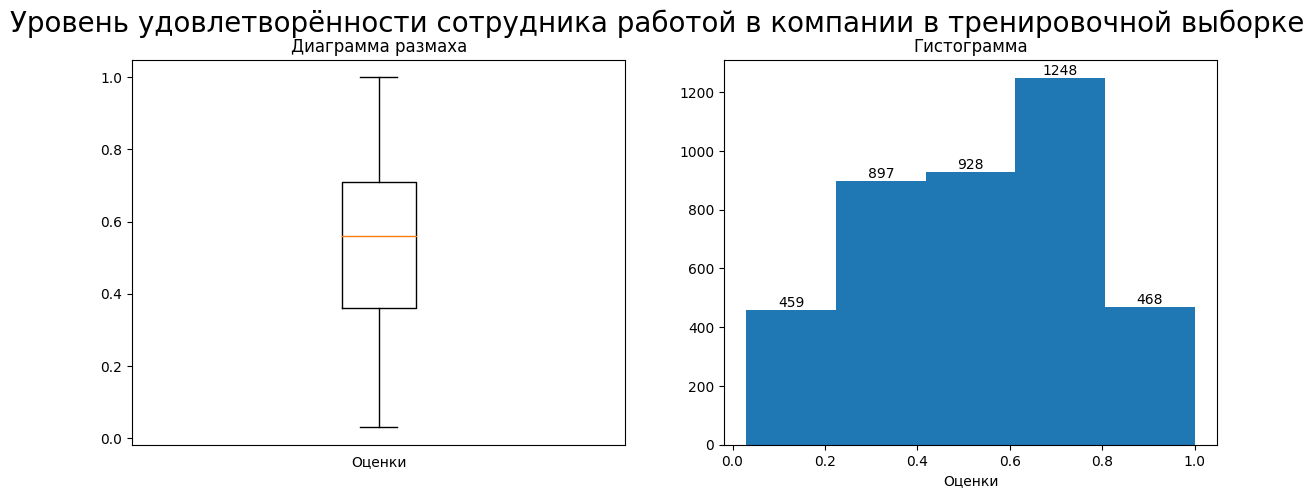

In [37]:
box_hist_plot(train, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой в компании в тренировочной выборке', 'Оценки', 5)

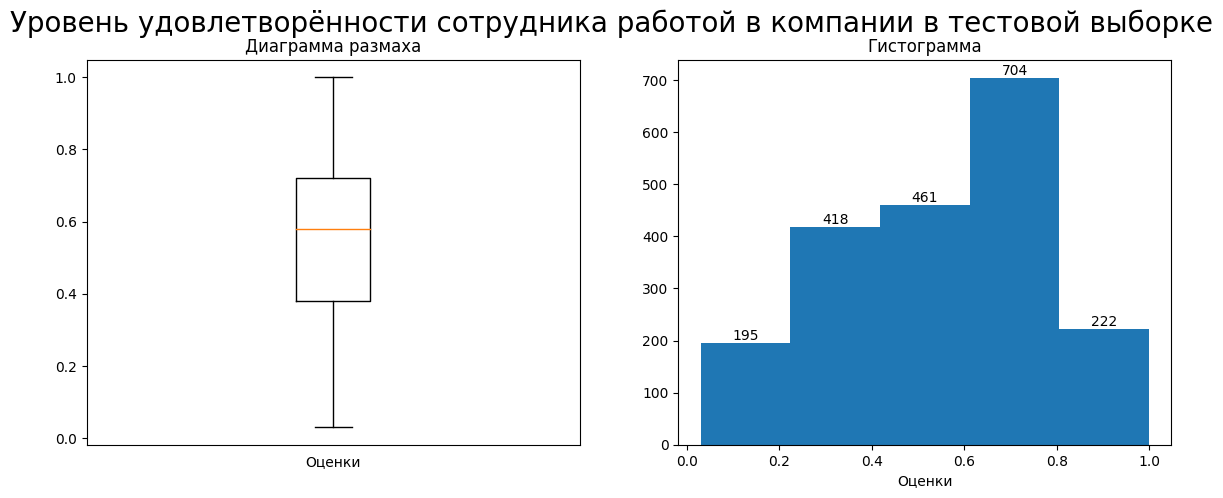

In [38]:
box_hist_plot(y_test, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой в компании в тестовой выборке', 'Оценки', 5)

Большинство сотрудников скорее удовлетворены своей работой. Медианные значения выборок и распределения схожи.

## Исследовательский анализ данных. Выводы.

Таким образом, 

- Самым большим по численности сотрудников является девартамент "Продажи"
- Больше всего сотрудников с уровнем должности "Junior"
- Чуть более половины сотрудников имеют средний уровень рабочей нагрузки
- У подавляющего большинства сотрудников за последний год не было повышений
- Большинство сотрудников не нарушало трудовой договор за последний год
- Распределение сотрудников по стажу работ: чем меньше стаж, тем больше таких сотрудников
- Большинство сотрудников получили оценки 4 и 3 от своих руководителей за качество проделанной работы
- Большинство сотрудников скорее удовлетворены своей работой
- Сотрудников с большим размером оплаты труда (из представленного распределения) меньшинство.

## Матрица корреляции

In [39]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['job_satisfaction_rate', 'salary']

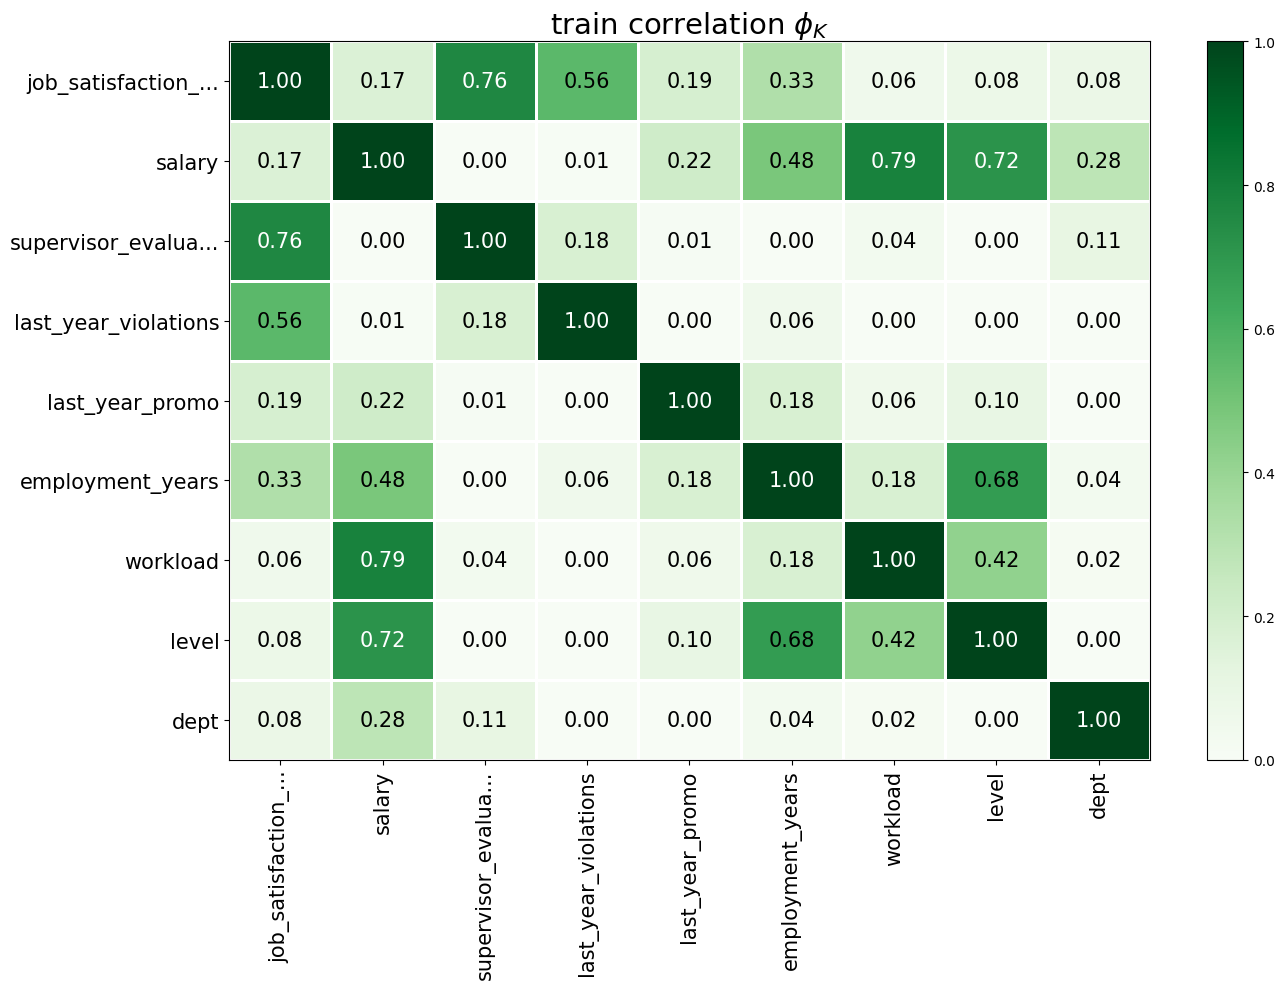

In [40]:
# считаем корреляции в тренировочной выборке
phik_overview = phik_matrix(train, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'train correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(14, 10)) 

In [41]:
# сделаем общую таблицу с тестовыми данными
test = X_test.merge(y_test, left_index=True, right_index=True)

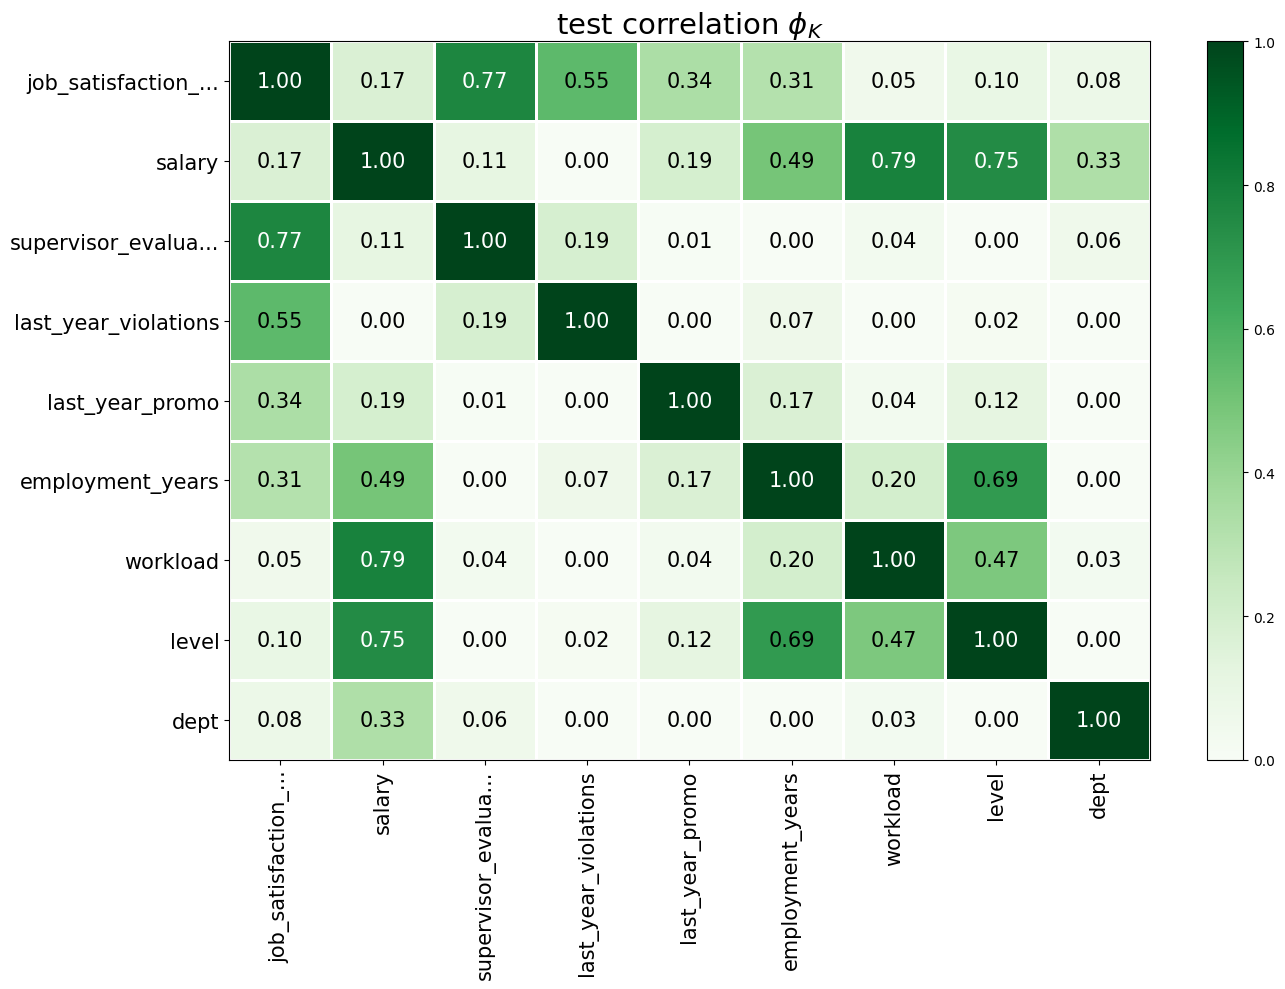

In [42]:
# считаем корреляции в тестовой выборке
phik_overview = phik_matrix(test, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'test correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(14, 10)) 

Наблюдается высокая корреляция между уровнем удовлетворенности сотрудника и оценкой качества работы сотрудника, которую дал руководитель. 
Коэффициенты корреляции ниже 0,9, мультиколлинеарность не наблюдается. Поэтому оставляем все признаки.

## Обучение модели

In [43]:
train = train.drop_duplicates()

In [44]:
# делим данные на входные и целевые
X_train = train.drop(columns='job_satisfaction_rate')
X_train = X_train.sort_index()

y_train = train['job_satisfaction_rate']
y_train = y_train.sort_index()

y_test = y_test['job_satisfaction_rate']
y_test = y_test.sort_index()


In [45]:
test_df = X_test.merge(y_test, left_index=True, right_index=True)

X_test = test_df.drop(['job_satisfaction_rate'], axis=1)
y_test = test_df['job_satisfaction_rate']

In [46]:
X_train.shape

(3755, 8)

In [47]:
X_test.shape

(2000, 8)

In [48]:
y_train.shape

(3755,)

In [49]:
y_test.shape

(2000,)

In [50]:
# Списки столбцов, разделенные по признаку форматирования данных 

# OneHotEncoder
ohe_columns = ['dept', 
               'last_year_promo', 
               'last_year_violations']
# OrdinalEncoder
ord_columns = ['level', 
               'workload']
# Числовые признаки
num_columns = ['salary', 
               'supervisor_evaluation', 
               'employment_years']

In [51]:
# SimpleImputer + OHE
ohe_pipe = Pipeline([('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))])

# SimpleImputer + ORD + SimpleImputer
ord_pipe = Pipeline([('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'sinior'],
                                           ['low', 'medium', 'high']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]) 

# Пайплайн подготовки данных
data_preprocessor = ColumnTransformer([('ohe', ohe_pipe, ohe_columns),
                                       ('ord', ord_pipe, ord_columns),
                                       ('num', StandardScaler(), num_columns)],
                                      remainder='passthrough') 

# Итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))])

In [52]:
# Параметры для LinearRegression
linear_params = {'model': [LinearRegression()], 
                 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Параметры для KNeighborsRegressor
knn_params = {'model': [KNeighborsRegressor()],
              'model__n_neighbors': [2, 5, 10, 25, 50],
              'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Параметры для DecisionTreeRegressor
tree_params = {'model': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
               'model__max_depth': [None],
               'model__min_samples_leaf': range(5, 6),
               'model__min_samples_split': range(20, 25),
               'model__max_leaf_nodes': range(310, 333), 
               'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}


# Параметры для SVR
svr_params = {'model': [SVR()],
              'model__C': [5,6,7,8,9,10,11,12,13,14,15],
              'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}


param_grid = [linear_params, knn_params, tree_params, svr_params]

In [53]:
# Метрика SMAPE

def smape(y_test, y_pred):
    metric = np.mean(np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_test)) * 2)*100
    return metric

smape_score = make_scorer(smape, greater_is_better=False)

In [54]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=smape_score,
    n_jobs=-1)

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(steps=[...
                          'model__max_leaf_nodes': range(310, 333),
                          'model__min_samples_leaf': range(5, 6),
                          'model__min_samples_split': range(20, 25),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]},
                         {'model': [SVR(C=6)],
                          'model__C': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                RobustScaler()]}],
             scoring=make_scorer(smape, greater_is_better=False))

In [56]:
print(f'Лучшая модель и её параметры:\n\n {grid_search.best_estimator_}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                   

In [57]:
print (f'Метрика лучшей модели на кросс-валидации: {round(np.abs(grid_search.best_score_), 4)}')

Метрика лучшей модели на кросс-валидации: 17.0772


In [58]:
# Предсказания лучшей модели
y_pred = grid_search.best_estimator_.predict(X_test)

In [59]:
# Сравнение предсказаний и фактических значений целевого признака
smape(y_test, y_pred)

14.86255877627159

Лучше всего показала себя модель "метод опорных векторов" с параметром С=6

In [60]:
regression_models_results = pd.DataFrame(grid_search.cv_results_)
regression_models_results = regression_models_results.sort_values(by='rank_test_score')
regression_models_results['mean_test_score'] *= -1
regression_models_results[['param_model', 'params', 'mean_test_score', 'rank_test_score']].head()

,param_model,params,mean_test_score,rank_test_score
366,SVR(C=6),"{'model': SVR(C=6), 'model__C': 6, 'preprocess...",17.077227,1
369,SVR(C=6),"{'model': SVR(C=6), 'model__C': 7, 'preprocess...",17.080315,2
372,SVR(C=6),"{'model': SVR(C=6), 'model__C': 8, 'preprocess...",17.099895,3
363,SVR(C=6),"{'model': SVR(C=6), 'model__C': 5, 'preprocess...",17.108685,4
375,SVR(C=6),"{'model': SVR(C=6), 'model__C': 9, 'preprocess...",17.142473,5


In [61]:
# Сравним работу нашей модели с работой модели DummyRegressor (с 2 разными стратегиями)
dummy_mean = DummyRegressor(strategy='mean')
dummy_median = DummyRegressor(strategy='median')

dummy_mean.fit(X_train, y_train)
dummy_median.fit(X_train, y_train)

d_mean_preds = dummy_mean.predict(X_test)
d_median_preds = dummy_median.predict(X_test)

mean_smape = smape(y_test, d_mean_preds)
median_smape = smape(y_test, d_median_preds)

print (f'Метрика DummyRegressor(strategy="mean"): {round(np.abs(mean_smape), 4)}')
print (f'Метрика DummyRegressor(strategy="median"): {round(np.abs(median_smape), 4)}')

Метрика DummyRegressor(strategy="mean"): 58.7719
Метрика DummyRegressor(strategy="median"): 60.314


Модель "метод опорных векторов" с параметром С=6 показала себя значительно лучше, чем константная модель DummyRegressor с двумя разными параметрами. 

# Задача №1: Выводы

- На этапе предобработки данных были устранены мелкие недочеты в данных и удалено 245 дубликатов.
- Был проведен исследовательский анализ данных, в результате которого были сделаны отдельные выводы о распределении сотрудников компании по отдельным признакам. Подготовка данных к моделированию осуществлялся с помощью пайплайна:
    - Категориальные номинальные переменные кодировались с помощью OneHotEncoder, категориальные ранговые переменные кодировались с помощью OrdinalEncoder. Числовые непрерывные переменные стандартизировались с помощью StandardScaler.
- Проведен корреляционный анализ признаков. Наблюдалась высокая корреляция между уровнем удовлетворенности сотрудника и оценкой качества работы сотрудника, которую дал руководитель. Было принято решение оставить все признаки, так как мультиколлинеарность отсутствовала.
- Поиск подходящих моделей для предсказаний осуществлялся с помощью пайплайнов. Были обучены 4 модели регрессии: LinearRegression, KNeighborsRegressor, DecisionTreeRegressor и SVR. К каждой модели были подобраны гиперпараметры. Модели отбирались с помощью метрики SMAPE.
- Лучшая модель - "метод опорных векторов" с параметром С=6. На кросс-валидации по метрике SMAPE модель показала 17.08, а на тестовой  выборке - 14.86

# Задача №2 

## Загрузка данных

In [62]:
# Открытие данных через конструкцию try-except

try:
    train_2 = pd.read_csv('/datasets/train_quit.csv')
    X_test_2 = pd.read_csv('/datasets/test_features.csv')
    y_test_2 = pd.read_csv('/datasets/test_target_quit.csv')

except:
    train_2 = pd.read_csv('datasets/train_quit.csv')
    X_test_2 = pd.read_csv('datasets/test_features.csv')
    y_test_2 = pd.read_csv('datasets/test_target_quit.csv')

In [63]:
df_list_2 = {'train_2': train_2, 
           'X_test_2': X_test_2,
           'y_test_2': y_test_2}

In [64]:
# Выведем первые строки и общую информацию о каждом датасете
for name, df in df_list_2.items():
    print('_' * 60)
    print('_' * 28 + name + '_' * 27)
    print('_' * 60)
    display(df.head())
    display(df.info())
    display(df.describe())

____________________________________________________________
____________________________train_2___________________________
____________________________________________________________


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


____________________________________________________________
____________________________X_test_2___________________________
____________________________________________________________


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


____________________________________________________________
____________________________y_test_2___________________________
____________________________________________________________


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id
count,2000.000000
mean,552765.213500
std,253851.326129
min,100298.000000
25%,339052.000000
50%,550793.000000
75%,765763.750000
max,999029.000000


__Таким образом, в нашем распоряжении 3 датафрейма:__

1. `train_2` - Тренировочная выборка.
2. `X_test_2` - Входные признаки тестовой выборки.
3. `y_test_2` - Целевой признак тестовой выборки.

## Предобработка данных

### Сделать `id` индексом 

In [65]:
train_2 = train_2.set_index('id')
X_test_2 = X_test_2.set_index('id')
y_test_2 = y_test_2.set_index('id')

#### Неявные дубликаты

Замена пробелов пропущенными значениями

In [66]:
train_2 = train_2.replace(' ', np.nan)
X_test_2 = X_test_2.replace(' ', np.nan)

Далее проверим категориальные признаки на предмет наличия в них неявных дубликатов

In [67]:
train_2['dept'].value_counts()

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64

In [68]:
X_test_2['dept'].value_counts()

sales         763
technology    455
marketing     279
purchasing    273
hr            227
Name: dept, dtype: int64

In [69]:
train_2['level'].value_counts()

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64

In [70]:
# сделаем исправление грамматической ошибки
train_2['level'] = train_2['level'].replace('sinior', 'senior')

In [71]:
X_test_2['level'].value_counts()

junior    974
middle    854
sinior    171
Name: level, dtype: int64

In [72]:
# сделаем исправление грамматической ошибки
X_test_2['level'] = X_test_2['level'].replace('sinior', 'senior')

In [73]:
train_2['workload'].value_counts()

medium    2118
low       1208
high       674
Name: workload, dtype: int64

In [74]:
X_test_2['workload'].value_counts()

medium    1043
low        593
high       363
Name: workload, dtype: int64

Неявные дубликаты не обнаружены.

#### Явные дубликаты

In [75]:
print(f"В таблице `train_2` содержится {train_2.duplicated().sum()} явных дубликатов.")

В таблице `train_2` содержится 1413 явных дубликатов.


### Поиск пропущенных значений

In [76]:
df_list_2 = {'train_2': train_2, 
             'X_test_2': X_test_2}

for name, df in df_list_2.items():
    print('_' * 40)
    print(f"Количество пропусков в таблице {name}:")
    print(df.isna().sum())

________________________________________
Количество пропусков в таблице train_2:
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
________________________________________
Количество пропусков в таблице X_test_2:
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


Пропуски в значениях будут обработаны на этапе подготовки данных

### Изменение типов данных

In [77]:
for name, df in df_list_2.items():
    print('_' * 40)
    print(f"Типы данных в таблице {name}:")
    print(df.info())

________________________________________
Типы данных в таблице train_2:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 723290 to 853842
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   4000 non-null   object
 1   level                  4000 non-null   object
 2   workload               4000 non-null   object
 3   employment_years       4000 non-null   int64 
 4   last_year_promo        4000 non-null   object
 5   last_year_violations   4000 non-null   object
 6   supervisor_evaluation  4000 non-null   int64 
 7   salary                 4000 non-null   int64 
 8   quit                   4000 non-null   object
dtypes: int64(3), object(6)
memory usage: 312.5+ KB
None
________________________________________
Типы данных в таблице X_test_2:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column

## Предобработка данных. Выводы

- В таблицах столбец `id` был сделан индексом для удобства дальнейших обработок и упрощения поиска дубликатов. 
- Изначально были найдены пропуски данных в виде пробелов. В последующем они были заменены на пропущенные значения.
- Была исправлена грамматическая ошибка в слове "senior" в таблицах `train_2` и `X_test_2`.
- Было найдено 1413 дубликатов в таблице `train_2`. Затем - дубликаты были удалены. 
- Были найдены пропущенные значения в таблицах `train_2` и `X_test_2`. Обработка пропусков будет осуществляться на этапе построения модели.
- Типы данных в столбцах таблиц стоят такие, какие нужно. Замена не требуется.  

## Исследовательский анализ данных 

### Функции для построения диаграмм

In [78]:
# сделаем общую таблицу с тестовыми данными
test_2 = X_test_2.merge(y_test_2, left_index=True, right_index=True)

In [79]:
# добавление входного признака job_satisfaction_rate из задачи №1
train_2['job_satisfaction_rate'] = grid_search.best_estimator_.predict(train_2)
test_2['job_satisfaction_rate'] = grid_search.best_estimator_.predict(test_2)

In [80]:
# Функция для построения столбчатой и круговой диаграмм для категориальных признаков НЕМАСШТАБИРОВАННАЯ
def bar_round_plot_target(data, column, title):
    data_yes = data.query('quit == "yes"')
    data_no = data.query('quit == "no"')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
    fig.suptitle(title, fontsize=20)

    # Диаграмма №1
    plt.subplot(2,2,1)
    axs[0] = sns.barplot(y=data_no[column].value_counts(), x=data_no[column].value_counts().index)
    # Добавление подписей через plt.annotate
    for p in axs[0].patches:
        height = p.get_height()
        axs[0].annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center',
                        va='bottom')
    plt.setp(axs[0].get_xticklabels(), rotation=90)
    plt.title('Столбчатая диаграмма по оставшимся сотрудникам')

    # Диаграмма №1
    plt.subplot(2,2,2)
    axs[1] = sns.barplot(y=data_yes[column].value_counts(), x=data_yes[column].value_counts().index)
    # Добавление подписей через plt.annotate
    for p in axs[1].patches:
        height = p.get_height()
        axs[1].annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center',
                        va='bottom')
    plt.setp(axs[1].get_xticklabels(), rotation=90)
    plt.title('Столбчатая диаграмма по уволившимся сотрудникам')

In [86]:
# Функция для построения столбчатой и круговой диаграмм для категориальных признаков МАСШТАБИРОВАННАЯ
def bar_round_plot_target_normalized(column, title, train_2, test_2):
    train_2 = train_2.query('quit == "yes"')
    test_2 = test_2.query('quit == "yes"')
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
    fig.suptitle(title, fontsize=20)

    # Диаграмма №1
    plt.subplot(2,2,1)
    axs[0] = sns.barplot(y=train_2[column].value_counts(normalize=True), x=train_2[column].value_counts(normalize=True).index)
    # Добавление подписей через plt.annotate
    for p in axs[0].patches:
        height = p.get_height()
        axs[0].annotate(f'{round(height,3)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center',
                        va='bottom')
    plt.setp(axs[0].get_xticklabels(), rotation=90)
    plt.title('Масштабированная диаграмма по тренировочной выборке')

    # Диаграмма №2
    plt.subplot(2,2,2)
    axs[0] = sns.barplot(y=test_2[column].value_counts(normalize=True), x=test_2[column].value_counts(normalize=True).index)
    # Добавление подписей через plt.annotate
    for p in axs[0].patches:
        height = p.get_height()
        axs[0].annotate(f'{round(height,3)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center',
                        va='bottom')
    plt.setp(axs[0].get_xticklabels(), rotation=90)
    plt.title('Масштабированная диаграмма по тестовой выборке')

    plt.show()


In [91]:
# Функция для построения гистограмм плотности для количественных признаков МАСШТАБИРОВАННАЯ

def hist_plot_target_normalized(column, title, xlabel, ylabel, bins, train_2, test_2):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

    # Гистограмма №1
    plt.subplot(1,2,1)
    axs[0] = sns.histplot(data=train_2, x=column, hue='quit', stat='density', common_norm=False)
    axs[0].set_title('По тренировочной выборке')
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    # Добавление подписей через plt.annotate
    for p in axs[0].patches:
        height = p.get_height()
        axs[0].annotate(f'{round(height*10000,3)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='bottom') 
    plt.tight_layout()

    # Гистограмма №2
    plt.subplot(1,2,2)
    axs[1] = sns.histplot(data=test_2, x=column, hue='quit', stat='density', common_norm=False)
    axs[1].set_title('По тестовой выборке')
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    # Добавление подписей через plt.annotate
    for p in axs[1].patches:
        height = p.get_height()
        axs[1].annotate(f'{round(height*10000,3)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='bottom') 
    plt.tight_layout()
    plt.show()

In [100]:
# Функция для построения диаграммы размаха и гистограммы для количественных признаков НЕМАСШТАБИРОВАННАЯ
def box_hist_plot_target(data, column, title, xlabel, bins):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
    fig.suptitle(title, fontsize=20)
    
    plt.subplot(1,2,1)
    axs[0] = sns.boxplot(data=data, x='quit', y=column)
    axs[0].set_title('Диаграмма размаха')
    #axs[0].set_xticks([])
    axs[0].set_xlabel(xlabel)
    plt.title('Диаграмма размаха')

    plt.subplot(1,2,2)
    axs[1] = sns.histplot(data=data, x=column, hue='quit')
    axs[1].set_title('Гистограмма (НЕМАСШТАБИРОВАННАЯ)')
    axs[1].set_xlabel(xlabel)
    # Добавление подписей через plt.annotate
    for p in axs[1].patches:
        height = p.get_height()
        axs[1].annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='bottom') 
    plt.tight_layout()
    plt.show()

### Пункт 3.1. Исследовательский анализ данных

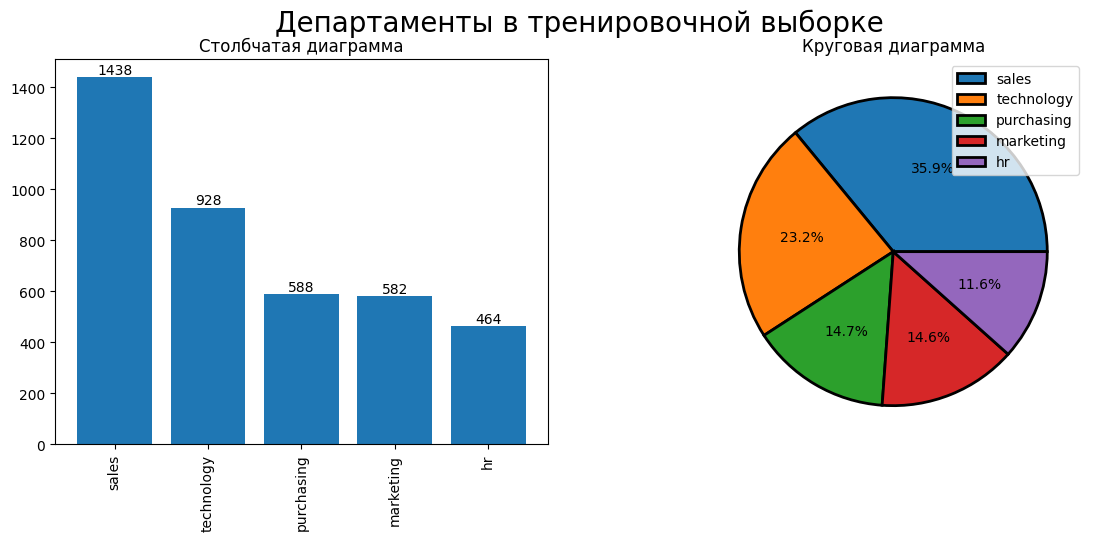

In [105]:
bar_round_plot(train_2, 'dept', 'Департаменты в тренировочной выборке')

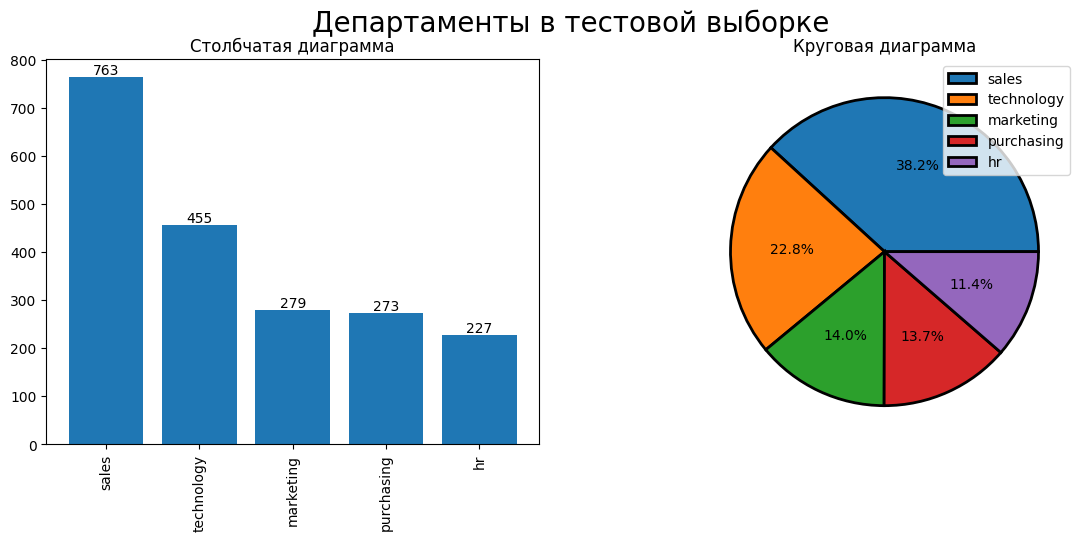

In [106]:
bar_round_plot(test_2, 'dept', 'Департаменты в тестовой выборке')

Тренировочная и тестовая выборки схожи по структуре департаментов. Однако, есть незначительные различия в 3 и 4 по популярности департаментам в структуре: в тренировочной выборке на 3-м месте стоит отдел закупок, в тестовой выборке - отдел маркетинга.

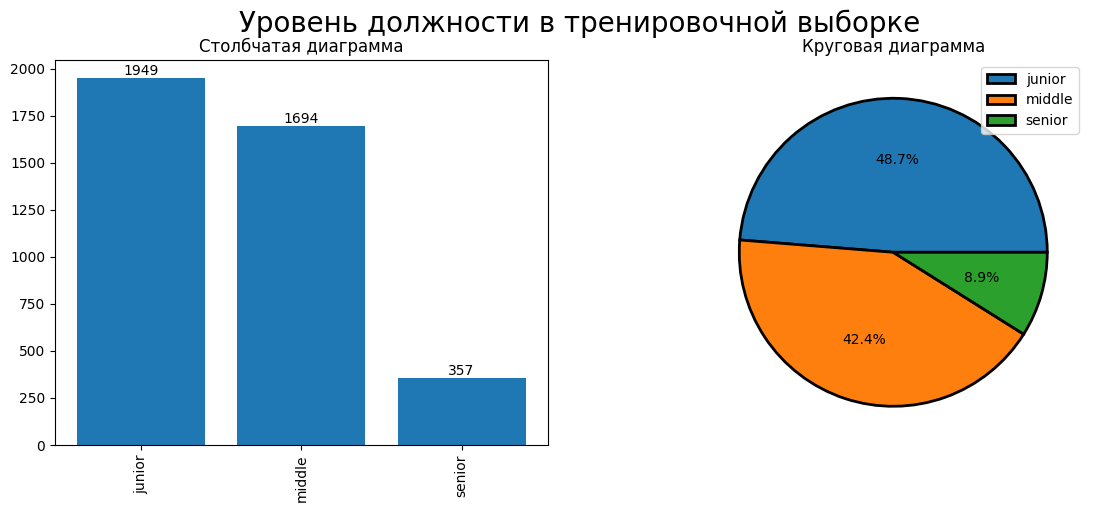

In [107]:
bar_round_plot(train_2, 'level', 'Уровень должности в тренировочной выборке')

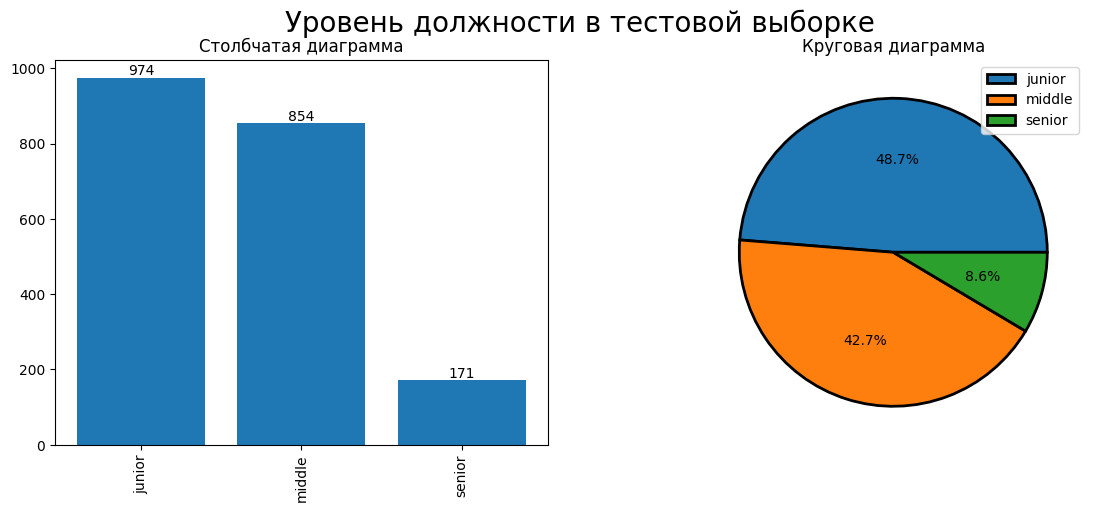

In [108]:
bar_round_plot(test_2, 'level', 'Уровень должности в тестовой выборке')

Тренировочная и тестовая выборки сходи по распределению уровней должности сотрудников. Специалистов среднего звена чуть меньше, чем новичков, в старших специалистов - меньше всего. 

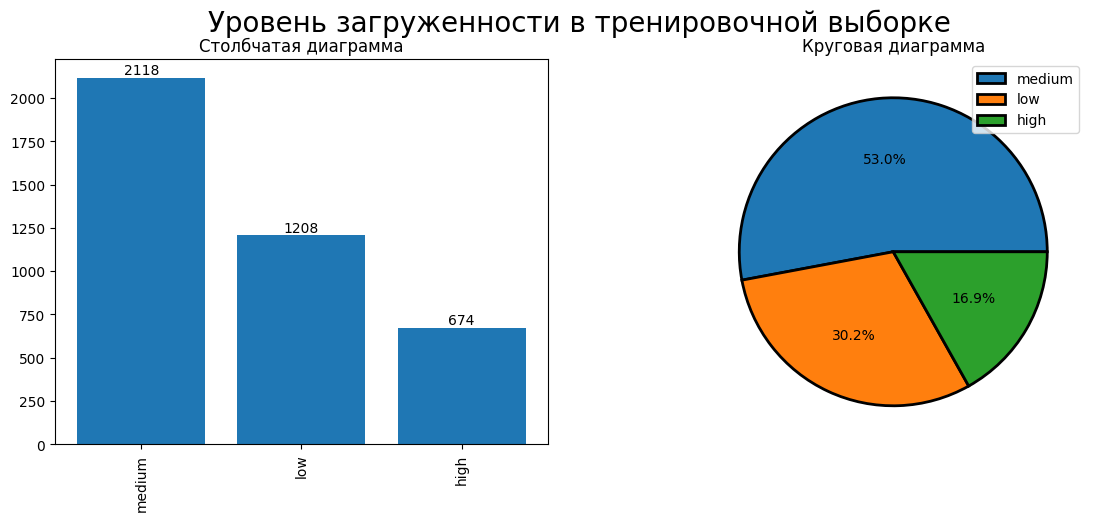

In [109]:
bar_round_plot(train_2, 'workload', 'Уровень загруженности в тренировочной выборке')

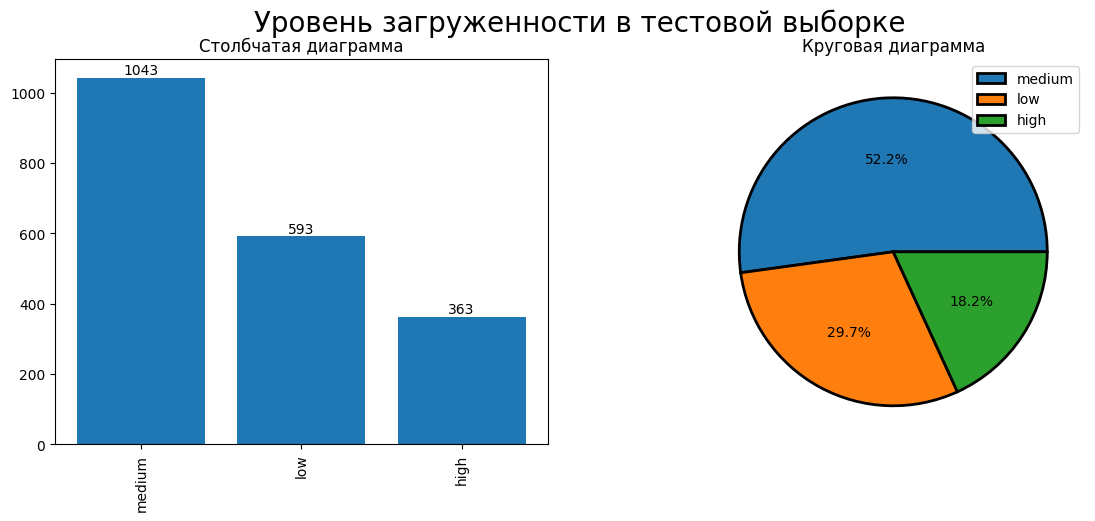

In [110]:
bar_round_plot(test_2, 'workload', 'Уровень загруженности в тестовой выборке')

По структуре уровня нагрузки тренировочная и тестовые выборки совпадают. Специалистов со средним уровнем нагрузки большинство (более 50%).

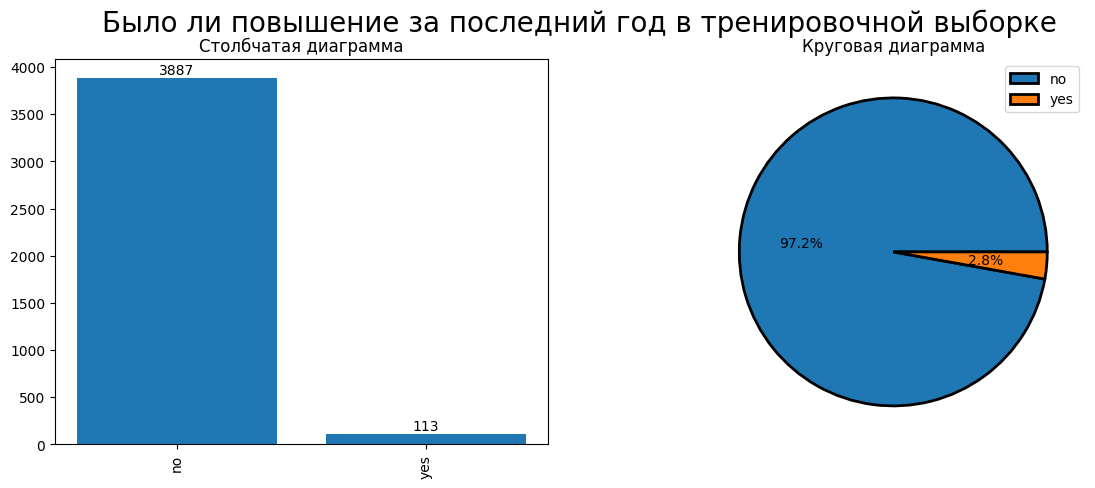

In [111]:
bar_round_plot(train_2, 'last_year_promo', 'Было ли повышение за последний год в тренировочной выборке')

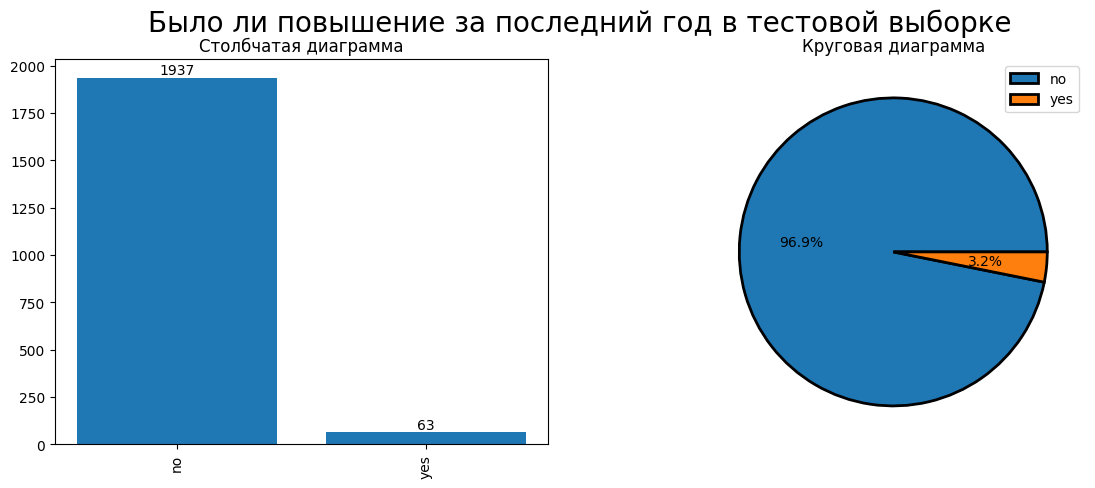

In [113]:
bar_round_plot(test_2, 'last_year_promo', 'Было ли повышение за последний год в тестовой выборке')

Тренировочная и тестовая выборки совпадают по проценту повышений за последний год. Стоит отметить, что доля людей с повышением весьма низкая. Если в этой компании индексация заработной платы также предполагает "повышение", то у подавляющего большинства сотрудников за последний год не было никакого поощрения со стороны руководства. Сотрудникам важно, что их труд оценивают по достоинству.  

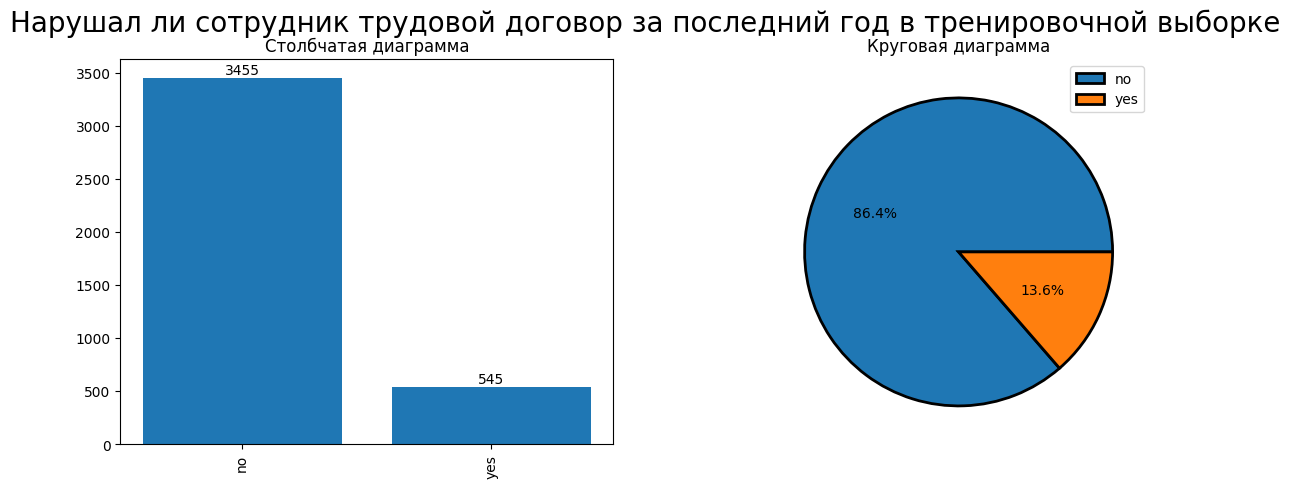

In [114]:
bar_round_plot(train_2, 'last_year_violations', 'Нарушал ли сотрудник трудовой договор за последний год в тренировочной выборке')

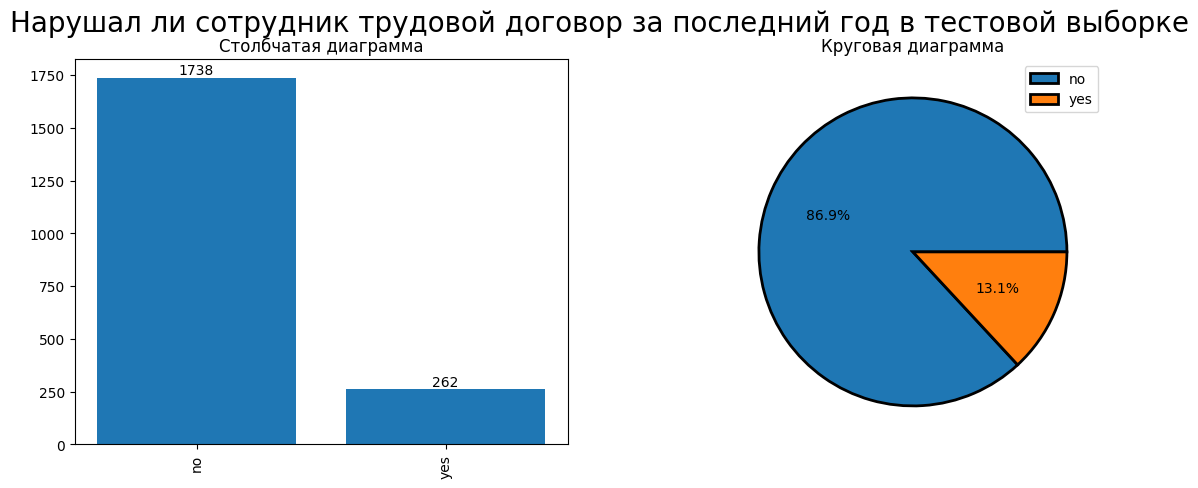

In [115]:
bar_round_plot(test_2, 'last_year_violations', 'Нарушал ли сотрудник трудовой договор за последний год в тестовой выборке')

По частоте нарушений трудового договора структуры тренировочной и тестовой выборки совпадают.

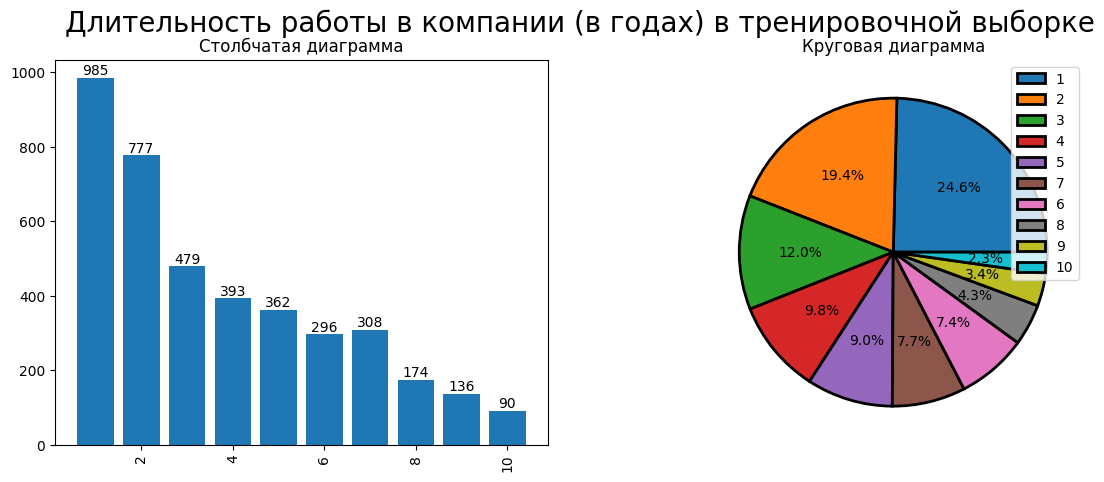

In [117]:
bar_round_plot(train_2, 'employment_years', 'Длительность работы в компании (в годах) в тренировочной выборке')

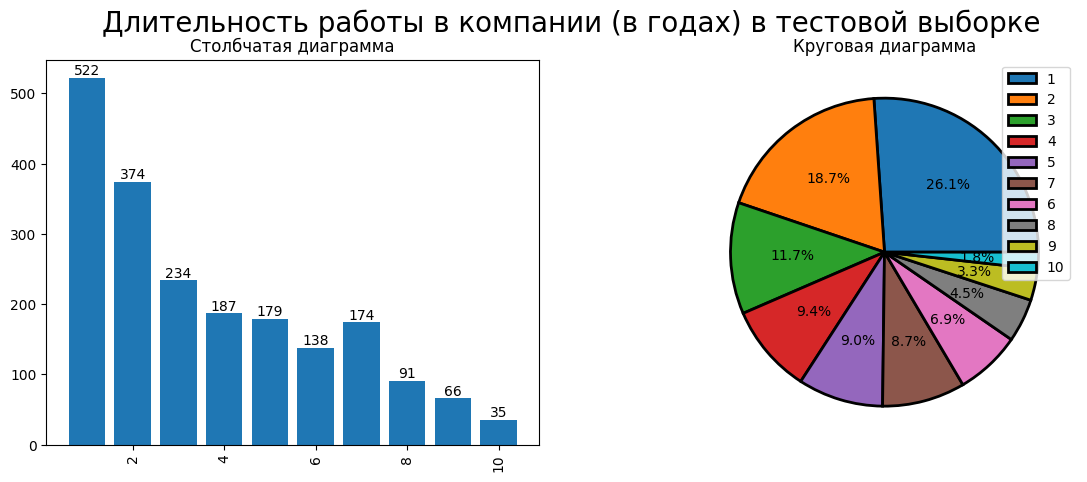

In [116]:
bar_round_plot(test_2, 'employment_years', 'Длительность работы в компании (в годах) в тестовой выборке')

Чем больше стаж сотрудников, тем их становится меньше. Парадоксально, что сотрудников со стажем в 6 лет меньше, чем сотрудников со стажем в 7 лет. Судя по всему часть данных была очищена после удаления дубликатов. Структуры тренировочной и тестовой выборки совпадают.

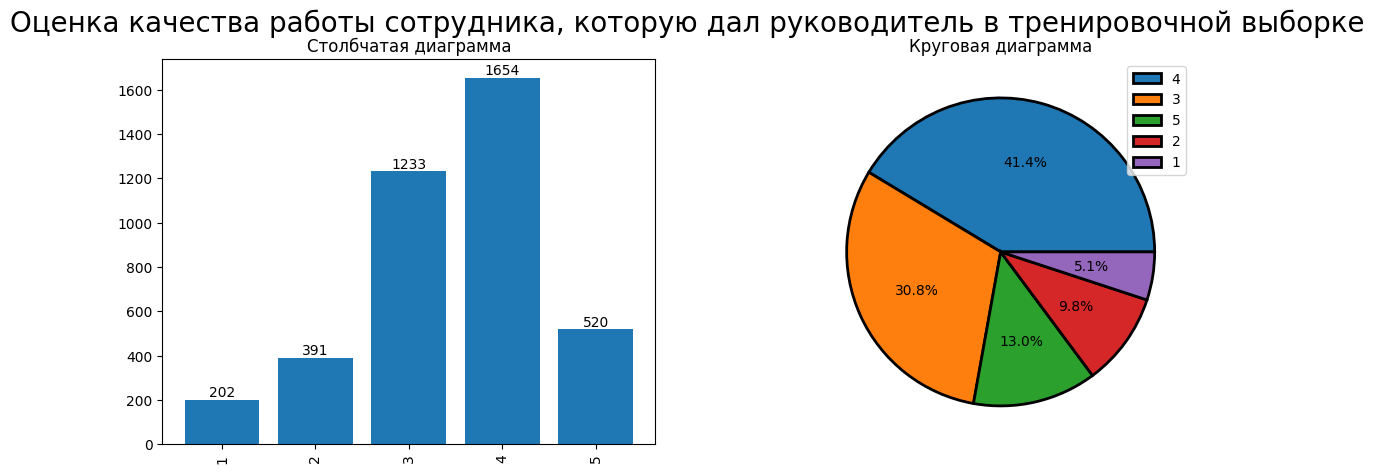

In [118]:
bar_round_plot(train_2, 'supervisor_evaluation', 'Оценка качества работы сотрудника, которую дал руководитель в тренировочной выборке')

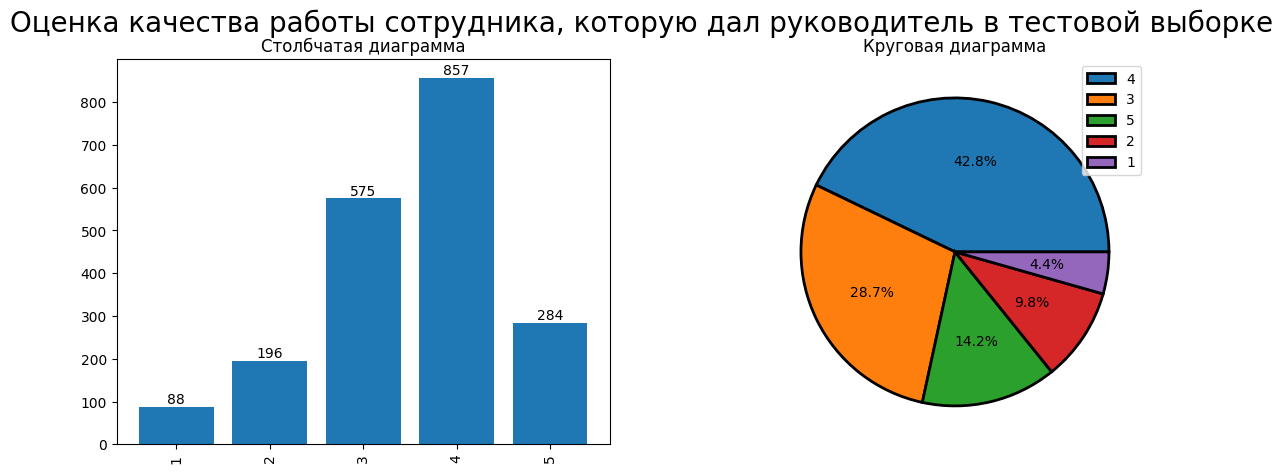

In [119]:
bar_round_plot(test_2, 'supervisor_evaluation', 'Оценка качества работы сотрудника, которую дал руководитель в тестовой выборке')

По структуре оценок выборки совпадают. Преобладают оценки 4 и 3. Получется, что у руководства в большинстве случает есть вопросы к качеству работы сотрудников. Отсюда и весьма редкие повышения.

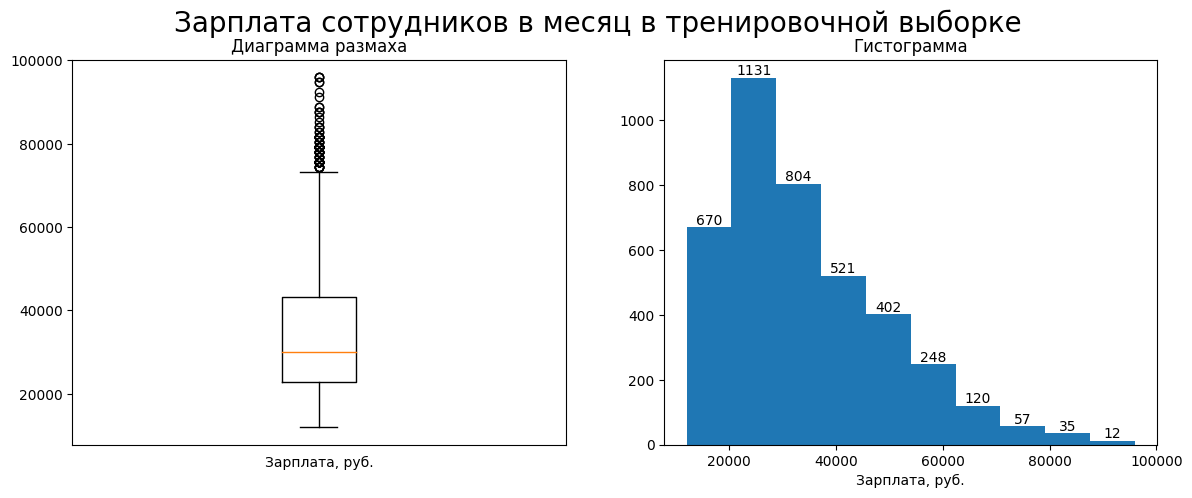

In [121]:
box_hist_plot(train_2, 'salary', 'Зарплата сотрудников в месяц в тренировочной выборке', 'Зарплата, руб.', 10)

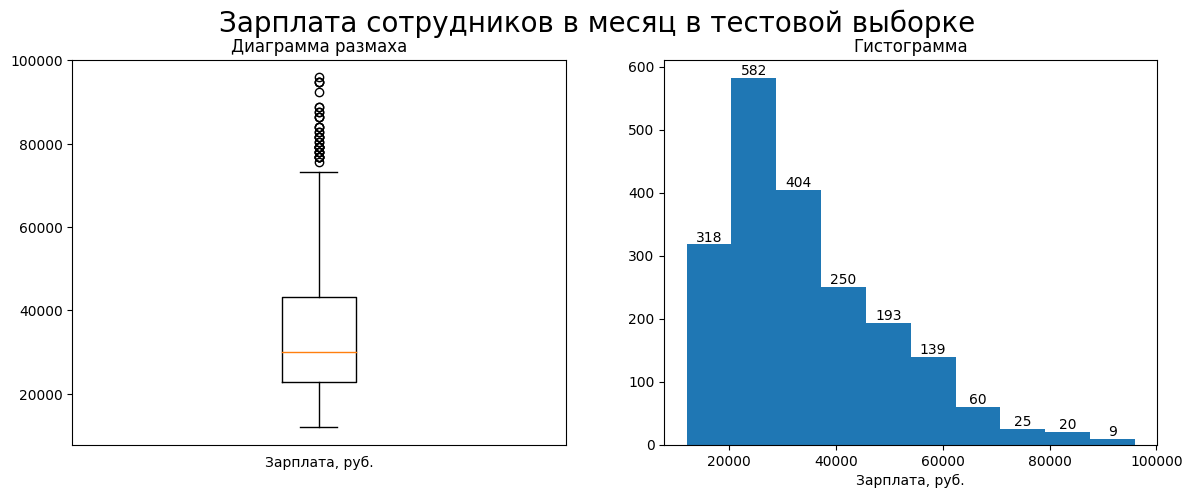

In [120]:
box_hist_plot(test_2, 'salary', 'Зарплата сотрудников в месяц в тестовой выборке', 'Зарплата, руб.', 10)

Медианные значения выборок и распределения схожи. Так как в компании большинство сотрудников с малым опытом, на начальной должности, то и распределение заработних плат соответствующее. 

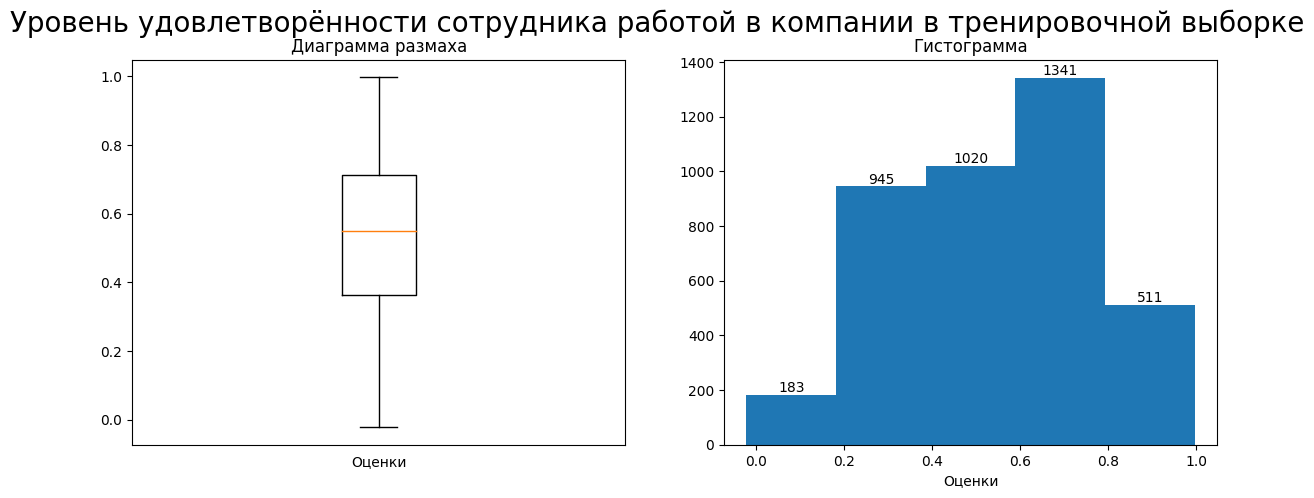

In [122]:
box_hist_plot(train_2, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой в компании в тренировочной выборке', 'Оценки', 5)

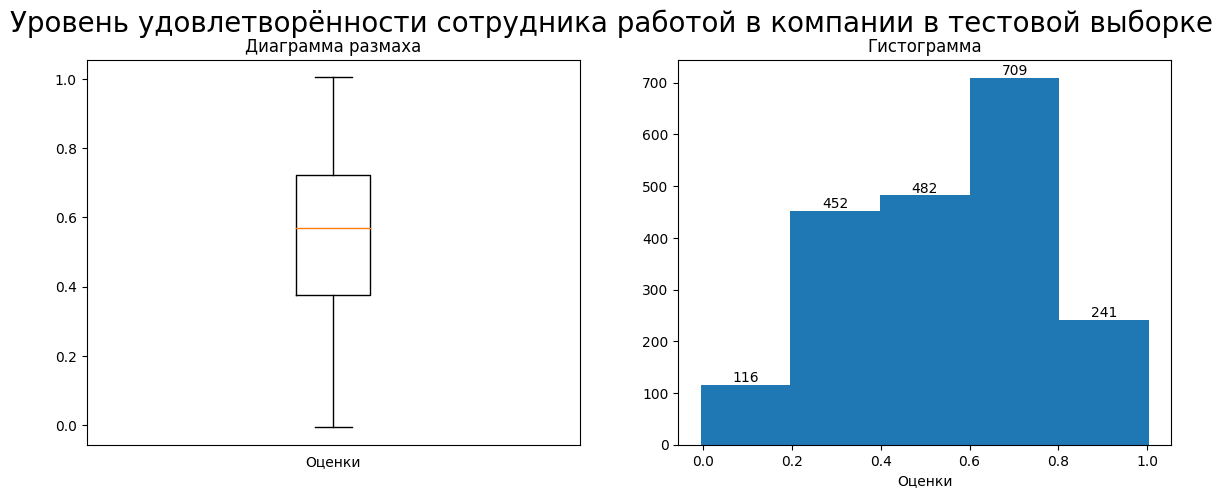

In [123]:
box_hist_plot(test_2, 'job_satisfaction_rate', 'Уровень удовлетворённости сотрудника работой в компании в тестовой выборке', 'Оценки', 5)

Большинство сотрудников скорее удовлетворены своей работой. Чаще всего встречаются оценки от 0.6 до 0.8. Медианные значения выборок и распределения схожи.

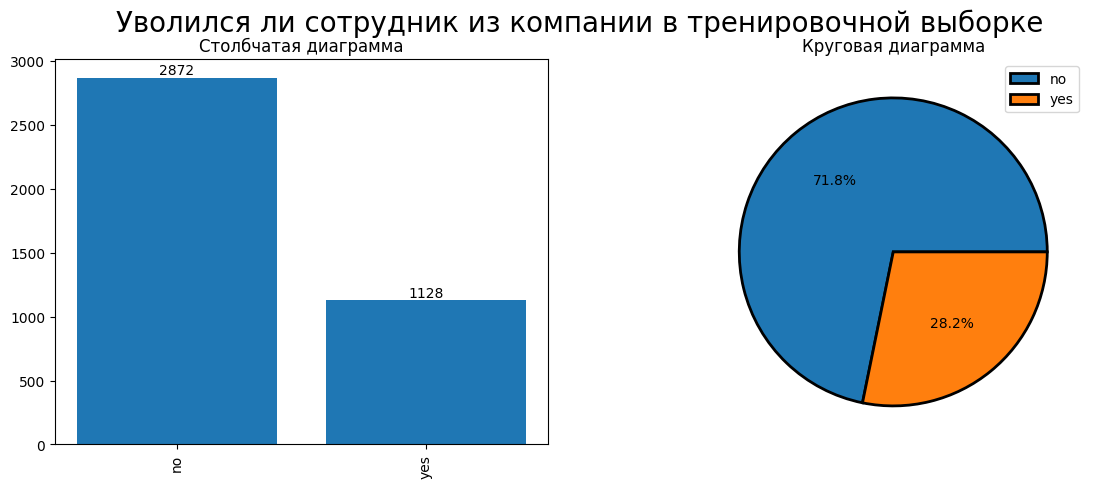

In [124]:
bar_round_plot(train_2, 'quit', 'Уволился ли сотрудник из компании в тренировочной выборке')

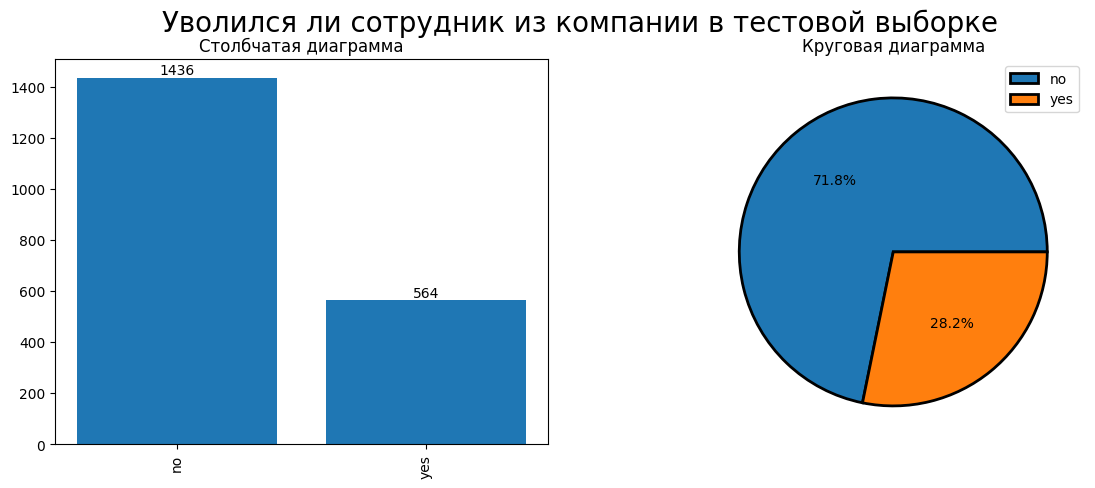

In [125]:
bar_round_plot(test_2, 'quit', 'Уволился ли сотрудник из компании в тестовой выборке')

По доле уволившихся сотрудников (целевой признак) тренировочная и тестовая выборки имеют примерно одинаковое соотношение. Уволилось 28,2% сотрудников.

Таким образом: 

- Больше всего сотрудников работает в Отделе продаж.
- Больше всего сотрудников имеют уровень должности Junior, чуть меньше - Middle. Меньше всего сотрудников (до 9% от общего числа) имеют уровень должности Senior.
- Более 50% всех сотрудников имеют средний уровень загруженности. Сотрудников с высоким уровнем загруженности меньшинство - около 18%.
- Только 3% от общего числа сотрудников побивались повышения за последний год.
- Нарушителей трудового договора около 13%.
- Больше всего сотрудников со стажем работы в 1 год. В распределении сотрудники убывают по мере увеличения стажа работы.
- Большинство сотрудников получали оценки 4 и 3 по качеству работы от своих руководителей.
- Медианная зарплата в компании 30000 рублей.
- В среднем по компании сотрудники удовлетворены своей работой и оценивают. ее выше средних значений (медиана 0.55-0.6).
- Уволившихся сотрудников в исследовании: 28.2%

Тренировочная и тестовая выборки сформированы пропорционально.

### Пункт 3.2. Портрет «уволившегося сотрудника»

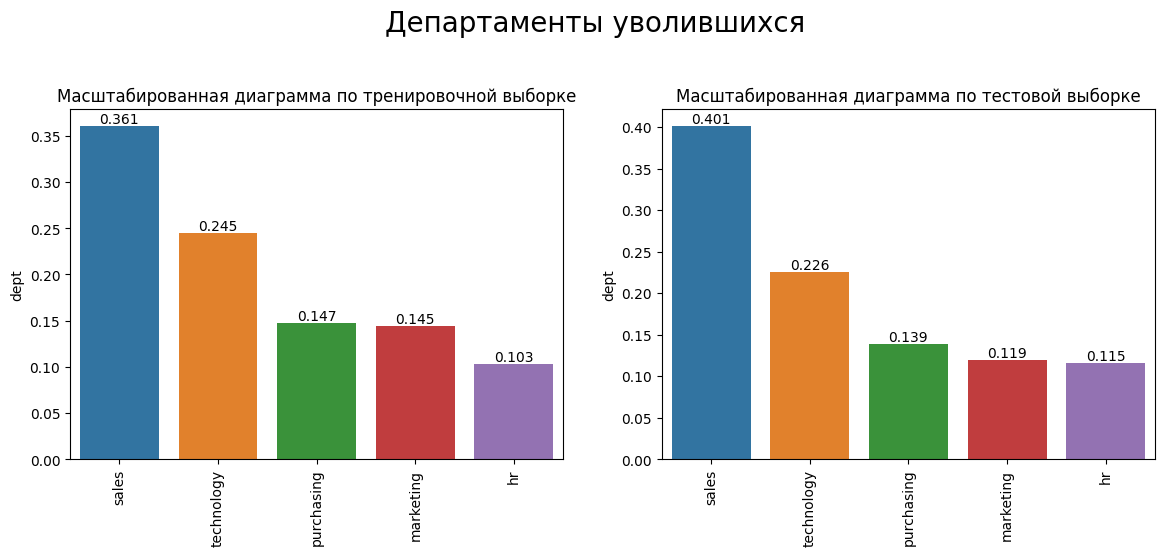

In [101]:
bar_round_plot_target_normalized('dept', 'Департаменты уволившихся', train_2, test_2)

Наиболее часто увольнения происходят в Отделе продаж. Распределение тренировочной и тестовой выборки совпадают.

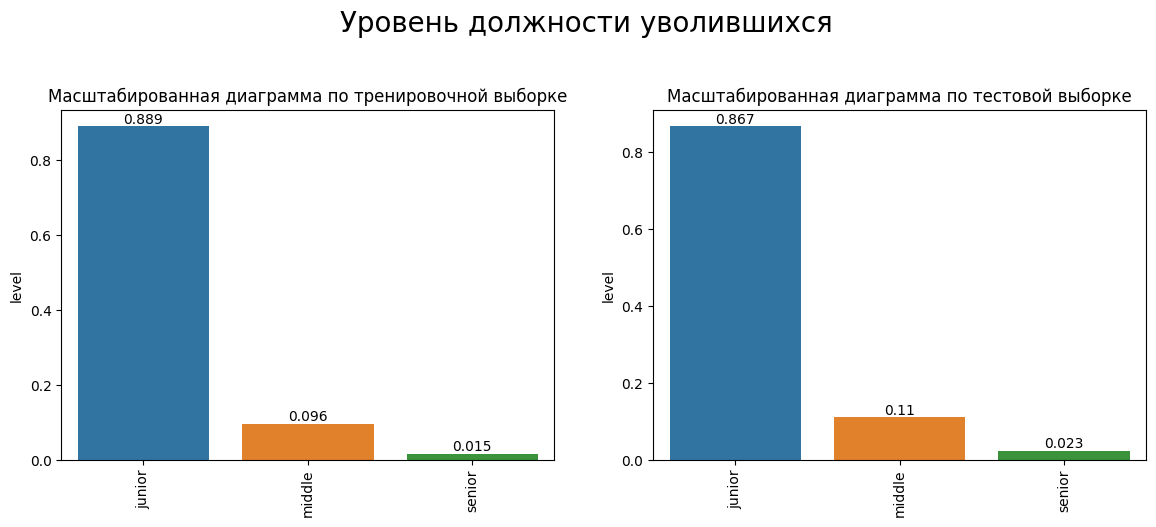

In [102]:
bar_round_plot_target_normalized('level', 'Уровень должности уволившихся', train_2, test_2)

Подавляющее большинство уволившихся сотрудников имели уровень должности Junior. Распределение тренировочной и тестовой выборки совпадают.

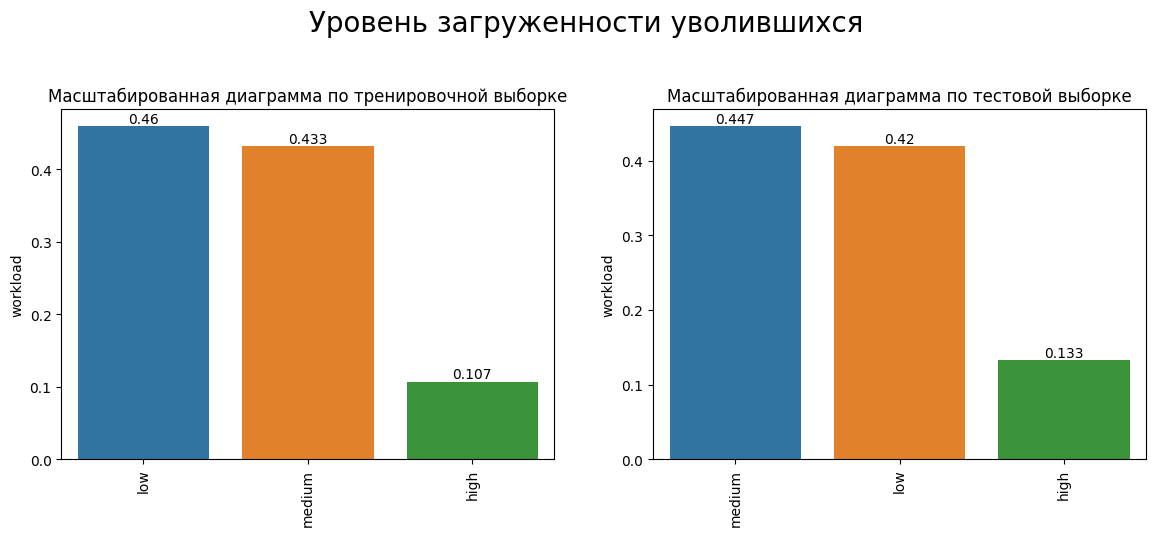

In [103]:
bar_round_plot_target_normalized('workload', 'Уровень загруженности уволившихся', train_2, test_2)

Распределение тренировочной и тестовой выборки различаются: в тренировочной выборке уволившиеся сотрудники имели низкий уровень нагрузки, в тестовой - средний.

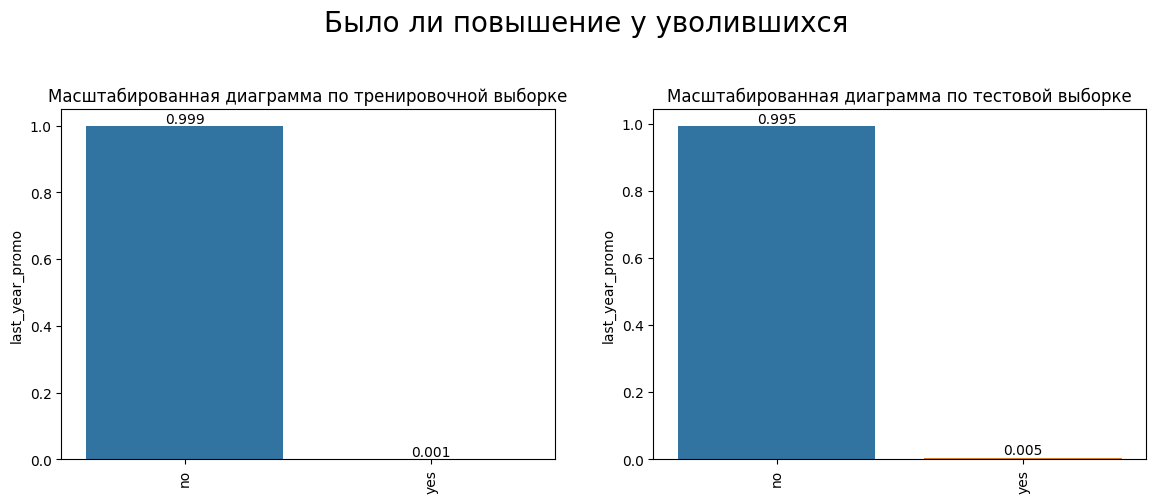

In [104]:
bar_round_plot_target_normalized('last_year_promo', 'Было ли повышение у уволившихся', train_2, test_2)

Подавляющее большинство уволившихся сотрудников не получали повышение за последний год. Распределение тренировочной и тестовой выборки совпадают.

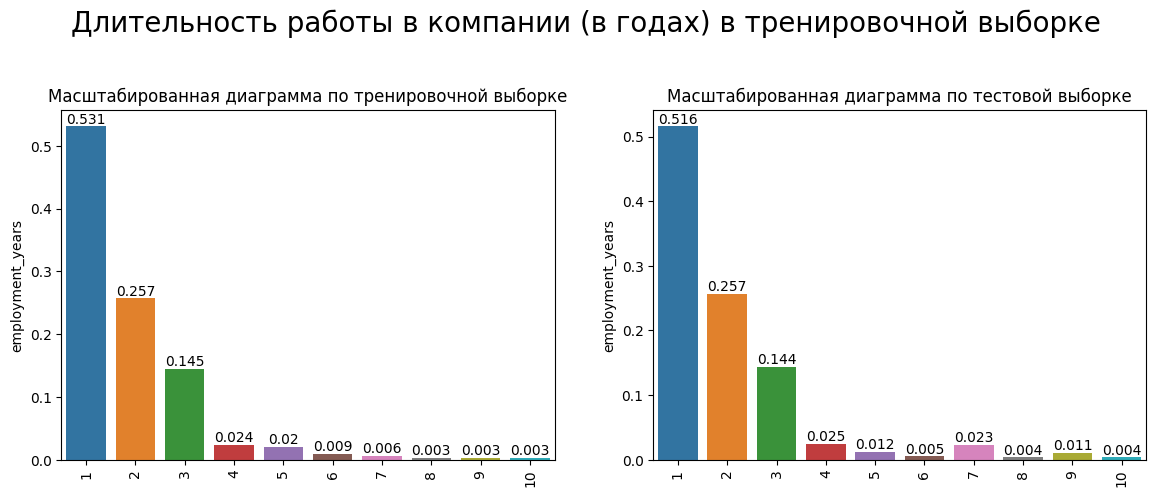

In [105]:
bar_round_plot_target_normalized('employment_years', 'Длительность работы в компании (в годах) в тренировочной выборке', train_2, test_2)

Подавляющее большинство сотрудников увольняется в первый год работы. С увеличением стажа риск увольнения снижается. Распределение тренировочной и тестовой выборки совпадают.

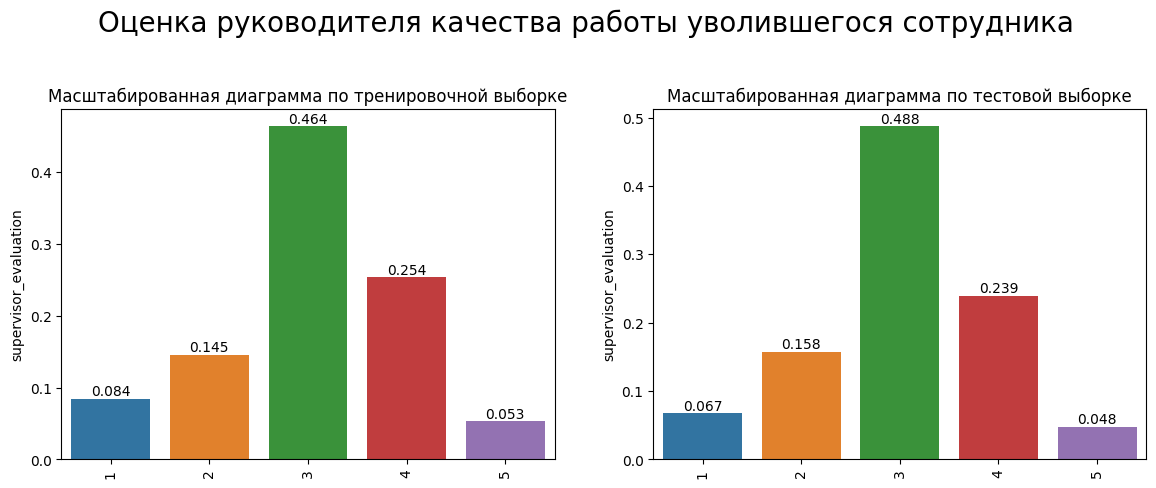

In [106]:
bar_round_plot_target_normalized('supervisor_evaluation', 'Оценка руководителя качества работы уволившегося сотрудника', train_2, test_2)

Уволившиеся сотрудники в большинстве своем получали оценку "3". Распределение тренировочной и тестовой выборки совпадают.

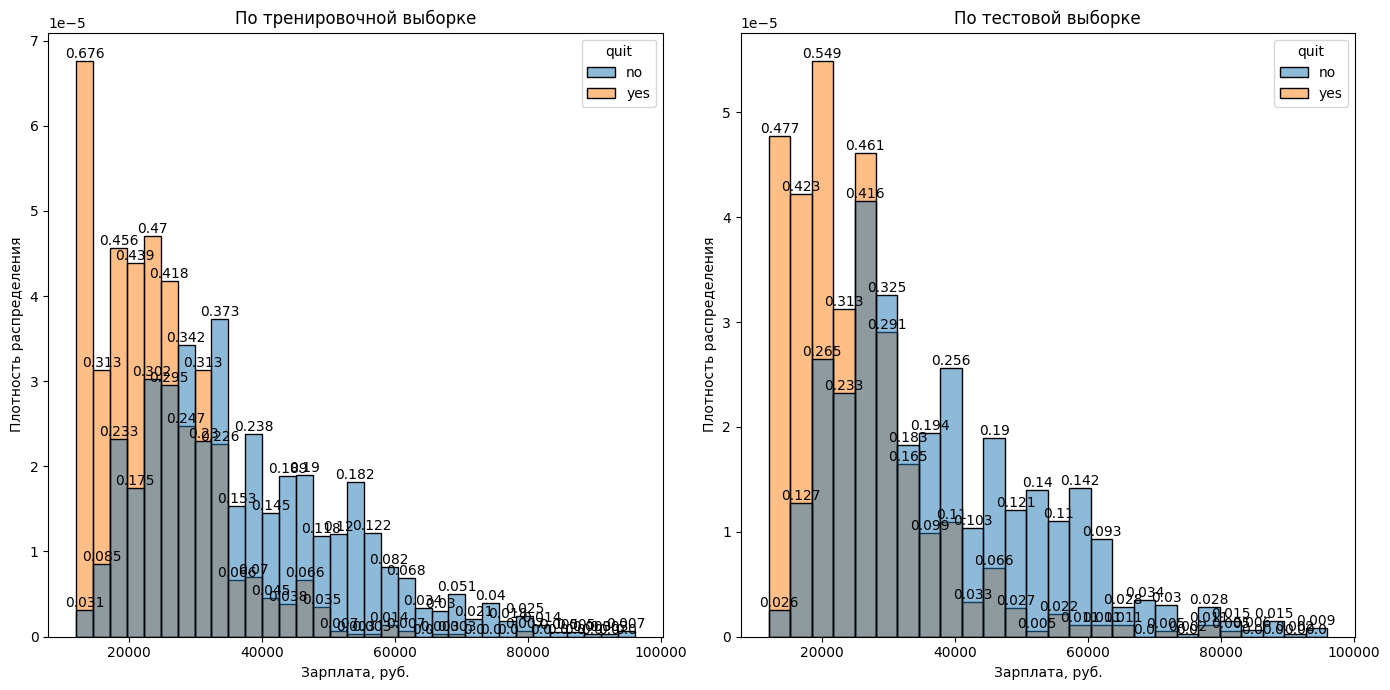

In [95]:
hist_plot_target_normalized('salary', 'Распределение зарплат', 'Зарплата, руб.', 'Плотность распределения', 10, train_2, test_2)

С наибольшей вероятностьюю уволившийся сотрудник имел зарплату до 35000 рублей.

Таким образом, характеристики уволившегося сотрудника следующие:

- С большей вероятностью он работал в отделе продаж. Из-за численности отдела там больше всего уволившихся.
- По уровню должности он junior-специалист.
- С большей вероятностью он имел низкий или средний уровень нагрузки на работе. Возможно, человеку просто было нечем заниматься или работа была однотипная и рутинная.  
- С большей вероятностью он не имел повышения за последний год. 
- Весьма вероятно, что он мог нарушить трудовой договор. Однако, подобных нарушителей достаточно и среди оставшихся сотрудников, так что это не является гарантией.
- С большей вероятностью он имел стаж работы в компании до 3 лет.
- С большей вероятностью руководитель оценил качество проделанной работы сотрудником на 3.
- С большей вероятностью он имел зарплату до 30000 рублей.
- Уровень удовлетворенности работой у такого сотрудника ниже среднего значения. 

### Пункт 3.3. Влияние уровня удовлетворенности на увольнение

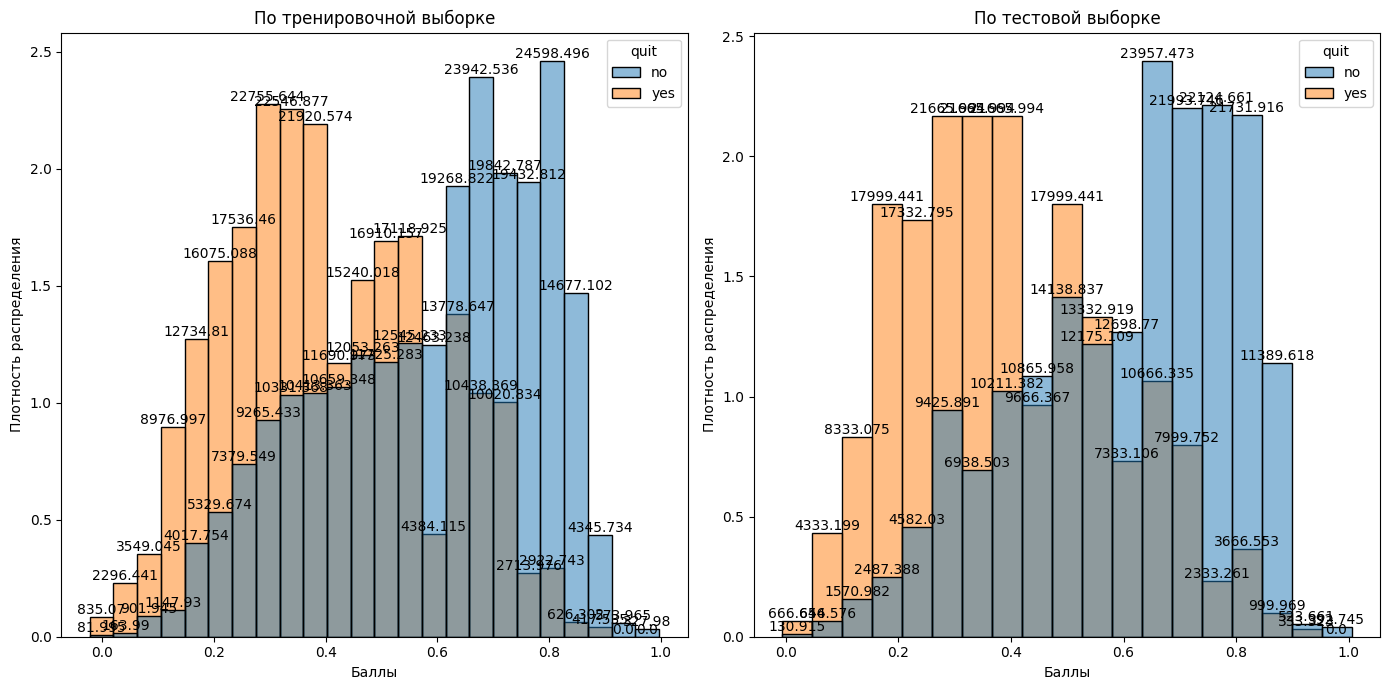

In [97]:
hist_plot_target_normalized('job_satisfaction_rate', 'Уровень удовлетворенности сотрудников', 'Баллы', 'Плотность распределения', 10, train_2, test_2)

Уволившиеся сотрудники в большинстве случаев менее удовлетворены своей работой. 

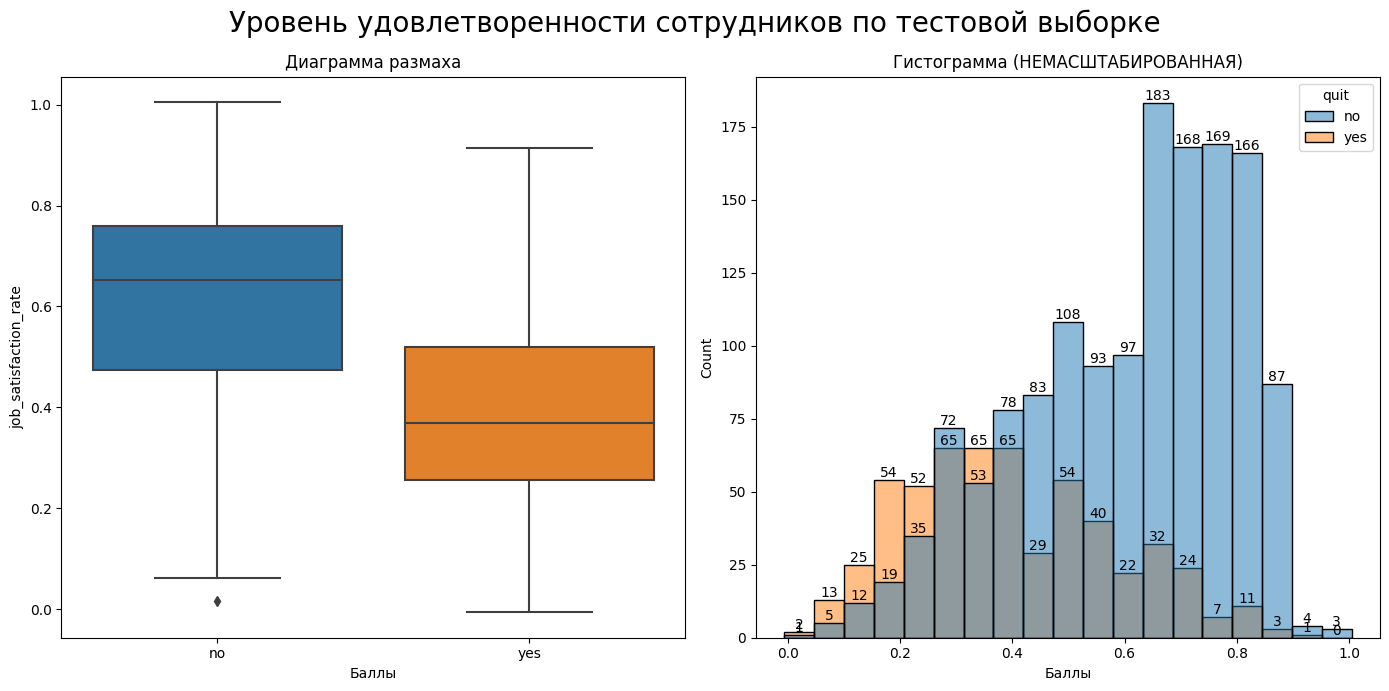

In [104]:
box_hist_plot_target(test_2, 'job_satisfaction_rate', 'Уровень удовлетворенности сотрудников по тестовой выборке', 'Баллы', 10)

Таким образом можно сделать вывод, что уровень удовлетворенности уволившихся сотрудников ниже, чем у оставшихся. 

## Исследовательский анализ данных. Выводы (общие).

**Пункт 3.1: Исследовательский анализ**

- Больше всего сотрудников работает в Отделе продаж.
- Больше всего сотрудников имеют уровень должности Junior, чуть меньше - Middle. Меньше всего сотрудников (до 9% от общего числа) имеют уровень должности Senior.
- Более 50% всех сотрудников имеют средний уровень загруженности. Сотрудников с высоким уровнем загруженности меньшинство - около 18%.
- Только 3% от общего числа сотрудников побивались повышения за последний год.
- Нарушителей трудового договора около 13%.
- Больше всего сотрудников со стажем работы в 1 год. В распределении сотрудники убывают по мере увеличения стажа работы.
- Большинство сотрудников получали оценки 4 и 3 по качеству работы от своих руководителей.
- Медианная зарплата в компании 30000 рублей.
- В среднем по компании сотрудники удовлетворены своей работой и оценивают. ее выше средних значений (медиана 0.55-0.6).
- Уволившихся сотрудников в исследовании: 28.2%
- **Тренировочная и тестовая выборки сформированы пропорционально.**

**Пункт 3.2: Портрет уволившегося сотрудника**

- С большей вероятностью он работал в отделе продаж. Из-за численности отдела там больше всего уволившихся.
- По уровню должности он junior-специалист.
- С большей вероятностью он имел низкий или средний уровень нагрузки на работе. Возможно, человеку просто было нечем заниматься или работа была однотипная и рутинная.  
- С большей вероятностью он не имел повышения за последний год. 
- Весьма вероятно, что он мог нарушить трудовой договор. Однако, подобных нарушителей достаточно и среди оставшихся сотрудников, так что это не является гарантией.
- С большей вероятностью он имел стаж работы в компании до 3 лет.
- С большей вероятностью руководитель оценил качество проделанной работы сотрудником на 3.
- С большей вероятностью он имел зарплату до 30000 рублей.
- Уровень удовлетворенности работой у такого сотрудника ниже среднего значения.

**Пункт 3.3: Влияние уровня удовлетворенности на увольнение**

- Уволившиеся сотрудники чаще менее удовлетворены своей работой.
- Уровень удовлетворенности уволившихся сотрудников ниже, чем у оставшихся. 

## Матрица корреляции

Для построения матриц корреляции необходимо добавить новый входной признак `job_satisfaction_rate`

In [ ]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['job_satisfaction_rate', 'salary']

In [ ]:
# считаем корреляции в тренировочной таблице
phik_overview = phik_matrix(train_2, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'train_2 correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(14, 10)) 

In [ ]:
# считаем корреляции в тестовой таблице
phik_overview = phik_matrix(test_2, interval_cols=interval_cols)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'test_2 correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(14, 10)) 

Коэффициенты корреляции ниже 0,9, мультиколлинеарность не наблюдается. Поэтому оставляем все признаки.

## Обучение модели

In [ ]:
train_2 = train_2.drop_duplicates()

In [ ]:
# делим данные на входные и целевые
X_train_2 = train_2.drop(columns='quit')
X_train_2 = X_train_2.sort_index()

y_train_2 = train_2['quit']
y_train_2 = y_train_2.sort_index()

X_test_2 = test_2.drop(columns='quit')
X_test_2 = X_test_2.sort_index()

y_test_2 = test_2['quit']
y_test_2 = y_test_2.sort_index()

In [ ]:
# добавление нового входного признака job_satisfaction_rate из задачи №1 в список для кодировщика
num_columns.append('job_satisfaction_rate')

In [ ]:
# кодирование целевого признака через LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train_2)

y_train_2 = label_encoder.transform(y_train_2)
y_test_2 = label_encoder.transform(y_test_2)

In [ ]:
X_train_2.shape

In [ ]:
X_test_2.shape

In [ ]:
y_train_2.shape

In [ ]:
y_test_2.shape

In [ ]:
# Итоговый пайплайн переделан под задачи классификации
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('model', DecisionTreeClassifier(random_state=RANDOM_STATE))])

In [ ]:
# Параметры для LogisticRegression
logistic_params = {'model': [LogisticRegression(random_state=RANDOM_STATE,
                                                solver='liblinear',
                                                max_iter=500)],
                   'model__penalty': ['l1', 'l2'],
                   'model__C': range(1, 5),
                   'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Параметры для KNeighborsClassifier
knn_params_2 = {'model': [KNeighborsClassifier()],
              'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Параметры для DecisionTreeClassifier
tree_params_2 = {'model': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
                 'model__max_depth': [None],
                 'model__min_samples_leaf': range(10, 15),
                 'model__min_samples_split': range(60, 65),
                 'model__max_leaf_nodes': range(430, 450), 
                 'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}


# Параметры для SVC
svc_params = {'model': [SVC(probability=True, random_state=RANDOM_STATE)],
              'model__degree': range(2, 10),
              'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler()]}


param_grid_2 = [logistic_params, knn_params_2, tree_params_2, svc_params]

In [ ]:
grid_search_2 = GridSearchCV(
    pipe_final_2, 
    param_grid_2, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1)

In [ ]:
grid_search_2.fit(X_train_2, y_train_2)

In [ ]:
print(f'Лучшая модель и её параметры:\n\n {grid_search_2.best_estimator_}')

In [ ]:
print (f'Метрика лучшей модели на кросс-валидации: {round(grid_search_2.best_score_, 4)}')

In [ ]:
# Предсказания лучшей модели
y_pred_2 = grid_search_2.best_estimator_.predict_proba(X_test_2)[:,1]

In [ ]:
# Сравнение предсказаний и фактических значений целевого признака
roc_auc_score(y_test_2, y_pred_2)

Лучше всего показала себя модель классификации "дерево решений" с параметрами:

- Максимальное количество узлов: 430
- Минимальное количество объектов в листе: 13
- Минимальное количество объектов для разделения 64

In [ ]:
classification_models_results = pd.DataFrame(grid_search_2.cv_results_)
classification_models_results = classification_models_results.sort_values(by='rank_test_score')
classification_models_results[['param_model', 'params', 'mean_test_score', 'rank_test_score']].head()

In [ ]:
# Сравним работу нашей модели с работой модели DummyClassifier (с 2 разными стратегиями)
d_mf_model = DummyClassifier(strategy='most_frequent')
d_uniform_model = DummyClassifier(strategy='uniform')

d_mf_model.fit(X_train_2, y_train_2)
d_uniform_model.fit(X_train_2, y_train_2)

d_mf_preds = d_mf_model.predict_proba(X_test_2)[:, 1]
d_uniform_preds = d_uniform_model.predict_proba(X_test_2)[:, 1]

d_mf_roc_auc = roc_auc_score(y_test_2, d_mf_preds)
d_uniform_roc_auc = roc_auc_score(y_test_2, d_uniform_preds)

print (f'Метрика DummyClassifier(strategy="most_frequent"): {round(np.abs(d_mf_roc_auc), 4)}')
print (f'Метрика DummyClassifier(strategy="uniform"): {round(np.abs(d_uniform_roc_auc), 4)}')

Модель "дерево решений" показала себя значительно лучше, чем модель DummyClassifier с двумя разными параметрами. 

# Задача №2: Выводы

- На этапе предобработки данных были устранены мелкие недочеты в данных и удалено 1415 дубликатов.
- Был проведен исследовательский анализ данных. В таблицы был добавлен новый признак - уровень удовлетворенности сотрудников работой. В ходе анализа была проверена закономерность между новым признаком и целевым - увольнение. Был сделан вывод, что уволившиеся сотрудники имеют низкие оценки своей работы. Также был составлен подробный портрет «уволившегося сотрудника».
    - С большей вероятностью он работал в отделе продаж. Из-за численности отдела там больше всего уволившихся.
    - По уровню должности он junior-специалист.
    - С большей вероятностью он имел низкий уровень нагрузки на работе. Ему нечем было заниматься из-за чего пропал интерес к работе.
    - С большей вероятностью он не имел повышения за последний год. 
    - Весьма вероятно, что он мог нарушить трудовой договор. Однако, подобных нарушителей достаточно и среди оставшихся сотрудников, так что это не является гарантией.
    - С большей вероятностью он имел стаж работы в компании до 3 лет.
    - С большей вероятностью руководитель оценил качество проделанной работы сотрудником на 3.
    - С большей вероятностью он имел зарплату до 30000 рублей.
    - Уровень удовлетворенности работой у такого сотрудника ниже среднего значения. 
- Подготовка данных к моделированию осуществлялся с помощью пайплайна:
    - Категориальные номинальные переменные кодировались с помощью OneHotEncoder. Категориальные ранговые переменные кодировались с помощью OrdinalEncoder. Числовые непрерывные переменные стандартизировались с помощью StandardScaler.
- Проведен корреляционный анализ признаков. Было принято решение оставить все признаки, так как мультиколлинеарность отсутствовала.
- Поиск подходящих моделей для предсказаний осуществлялся с помощью пайплайнов. Были обучены 4 модели классификации: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier и SVC. К каждой модели были подобраны гиперпараметры. Модели отбирались с помощью метрики roc-auc score.

Лучше всего показала себя модель классификации "дерево решений" с параметрами:
    - Максимальное количество узлов: 430
    - Минимальное количество объектов в листе: 13
    - Минимальное количество объектов для разделения 64
- Метрика roc-auc модели на кросс-валидации: 0.9028
- Метрика roc-auc модели на тестовых данных: 0.9231

# Предложения для бизнеса

- Стоит разработать программу по поддержке профессионального роста сотрудника. Это позволит сократить свободное время сотрудника, обучить его новым "инструментам труда" и повысить его производительность. У сотрудника появится интерес к работе. Непосредственное руководство будет его лучше оценивать, возможно будет продвигать на повышение. Профессиональный рост сотрудников может позволить при необходимости сократить численность сотрудников за счет увеличения КПД персонала.
- Разработать систему аттестаций. Чтобы с определенной периодичностью (допустим 1 раз в год) сотрудники подтягивали свои теоретические знания и практические умения, чтобы потом можно было проявить себя перед вышестоящим руководством. Лучших и наиболее заинтересованных в работе сотрудников необходимо повышать в должности и заработной плате. 
- Нанять корпоративного психолога или назначить человека из HR, с которым можно будет самостоятельно назначать встречу и поговорить о своем "самоощущении" на работе. Возможно, увольнения можно будет избежать с помощью совета, чтобы разрешить конфликт с непосредственным руководством или коллективом. Возможно, человеку просто не интересно на его текущем месте, так как он думает что это не его. В таком случае стоит рассмотреть возможность перевода в другой отдел. 